# 0.Data Load

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## matplotlib 그래프에서 한글 깨짐 해결
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [3]:
## 제공 데이터 불러오기
df = pd.read_excel('../data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx', header=[0,1])[:2891]  # 이후부터는 유입량이 없는 데이터
df.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in df.columns.values]

In [4]:
## 제공 데이터 사이즈
df.shape

(2891, 48)

In [5]:
cnts = df['홍수사상번호'].value_counts()
tmp = pd.Series([0], index=[0])
cnts = cnts.append(tmp)
cnts = cnts.sort_index().cumsum()
cnts

0        0
1      226
2      326
3      407
4      441
5      535
6      581
7      632
8      673
9      741
10     827
11     937
12    1064
13    1131
14    1181
15    1443
16    1648
17    1773
18    1838
19    1933
20    2197
21    2281
22    2566
23    2694
24    2788
25    2891
dtype: int64

In [6]:
display(df.head())
display(df.tail())

홍수사상번호     연  월   일  시간         유입량  데이터집단 1_유역평균강수  데이터집단 1_강우(A지역)  \
0       1  2006  7  10   8  189.100000             6.4                7   
1       1  2006  7  10   9  216.951962             6.3                7   
2       1  2006  7  10  10  251.424419             6.4                7   
3       1  2006  7  10  11  302.812199             7.3                7   
4       1  2006  7  10  12  384.783406             8.2                7   

   데이터집단 1_강우(B지역)  데이터집단 1_강우(C지역)  ...  데이터 집단 5_강우(D지역)  데이터 집단 5_수위(E지역)  \
0                7                7  ...                 8              2.54   
1                8                7  ...                10              2.53   
2                9                7  ...                11              2.53   
3               10                7  ...                14              2.53   
4               12                8  ...                16              2.53   

   데이터 집단 5_수위(D지역)  데이터 집단 6_유역평균강수  데이터 집단 6_강우(A지역)  데이터 집단 6_강우(B지역)  \
0           122.660              6.4                 7                 7   
1           122.648              7.3                 7                 8   
2           122.636              8.2                 7                 9   
3           122.620             11.3                 9                10   
4           122.604             14.4                12                12   

   데이터 집단 6_강우(C지역)  데이터 집단 6_강우(D지역)  데이터 집단 6_수위(E지역)  데이터 집단 6_수위(D지역)  
0                 8                 8              2.54           122.610  
1                10                10              2.53           122.600  
2                10                11              2.53           122.590  
3                15                14              2.53           122.585  
4                18                16              2.53           122.575  

[5 rows x 48 columns]

홍수사상번호     연  월   일  시간         유입량  데이터집단 1_유역평균강수  데이터집단 1_강우(A지역)  \
2886      25  2017  7  18  18  513.368437         22.7836                6   
2887      25  2017  7  18  19  502.846843          8.2586                2   
2888      25  2017  7  18  20  491.954805          4.1089                1   
2889      25  2017  7  18  21  481.103083          3.3854                1   
2890      25  2017  7  18  22  470.458109          3.2841                1   

      데이터집단 1_강우(B지역)  데이터집단 1_강우(C지역)  ...  데이터 집단 5_강우(D지역)  \
2886                0                1  ...                 1   
2887                0                1  ...                 1   
2888                0                1  ...                 1   
2889                0                1  ...                 1   
2890                0                1  ...                 1   

      데이터 집단 5_수위(E지역)  데이터 집단 5_수위(D지역)  데이터 집단 6_유역평균강수  데이터 집단 6_강우(A지역)  \
2886              3.03           137.088           1.7366                 6   
2887              3.00           137.104           1.7366                 2   
2888              2.98           137.120           1.7366                 1   
2889              2.96           137.136           1.7366                 1   
2890              2.94           137.152           1.7366                 1   

      데이터 집단 6_강우(B지역)  데이터 집단 6_강우(C지역)  데이터 집단 6_강우(D지역)  데이터 집단 6_수위(E지역)  \
2886                 0                 1                 1              3.03   
2887                 0                 1                 1              3.00   
2888                 0                 1                 1              2.98   
2889                 0                 1                 1              2.96   
2890                 0                 1                 1              2.94   

      데이터 집단 6_수위(D지역)  
2886           137.130  
2887           137.145  
2888           137.155  
2889           137.165  
2890           137.180  

[5 rows x 48 columns]

<br>
<hr>
<br>

# 1.Data EDA

## 1) Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   홍수사상번호            2891 non-null   int64  
 1   연                 2891 non-null   int64  
 2   월                 2891 non-null   int64  
 3   일                 2891 non-null   int64  
 4   시간                2891 non-null   int64  
 5   유입량               2891 non-null   float64
 6   데이터집단 1_유역평균강수    2891 non-null   float64
 7   데이터집단 1_강우(A지역)   2891 non-null   int64  
 8   데이터집단 1_강우(B지역)   2891 non-null   int64  
 9   데이터집단 1_강우(C지역)   2891 non-null   int64  
 10  데이터집단 1_강우(D지역)   2891 non-null   int64  
 11  데이터집단 1_수위(E지역)   2891 non-null   float64
 12  데이터집단 1_수위(D지역)   2891 non-null   float64
 13  데이터집단 2_유역평균강수    2891 non-null   float64
 14  데이터집단 2_강우(A지역)   2891 non-null   int64  
 15  데이터집단 2_강우(B지역)   2891 non-null   int64  
 16  데이터집단 2_강우(C지역)   2891 non-null   int64  


## 2) 결측치 확인

In [8]:
## 결측치 확인 (결측치 없음)
df.isnull().sum() / len(df) * 100

홍수사상번호              0.0
연                   0.0
월                   0.0
일                   0.0
시간                  0.0
유입량                 0.0
데이터집단 1_유역평균강수      0.0
데이터집단 1_강우(A지역)     0.0
데이터집단 1_강우(B지역)     0.0
데이터집단 1_강우(C지역)     0.0
데이터집단 1_강우(D지역)     0.0
데이터집단 1_수위(E지역)     0.0
데이터집단 1_수위(D지역)     0.0
데이터집단 2_유역평균강수      0.0
데이터집단 2_강우(A지역)     0.0
데이터집단 2_강우(B지역)     0.0
데이터집단 2_강우(C지역)     0.0
데이터집단 2_강우(D지역)     0.0
데이터집단 2_수위(E지역)     0.0
데이터집단 2_수위(D지역)     0.0
데이터집단 3_유역평균강수      0.0
데이터집단 3_강우(A지역)     0.0
데이터집단 3_강우(B지역)     0.0
데이터집단 3_강우(C지역)     0.0
데이터집단 3_강우(D지역)     0.0
데이터집단 3_수위(E지역)     0.0
데이터집단 3_수위(D지역)     0.0
데이터 집단 4_유역평균강수     0.0
데이터 집단 4_강우(A지역)    0.0
데이터 집단 4_강우(B지역)    0.0
데이터 집단 4_강우(C지역)    0.0
데이터 집단 4_강우(D지역)    0.0
데이터 집단 4_수위(E지역)    0.0
데이터 집단 4_수위(D지역)    0.0
데이터 집단 5_유역평균강수     0.0
데이터 집단 5_강우(A지역)    0.0
데이터 집단 5_강우(B지역)    0.0
데이터 집단 5_강우(C지역)    0.0
데이터 집단 5_강우(D지역)    0.0
데이터 집단 5_수위(E지역)    0.0
데이터 집단 5_수위(D지역)    0.0
데이터 집단 6_유역평균강수 

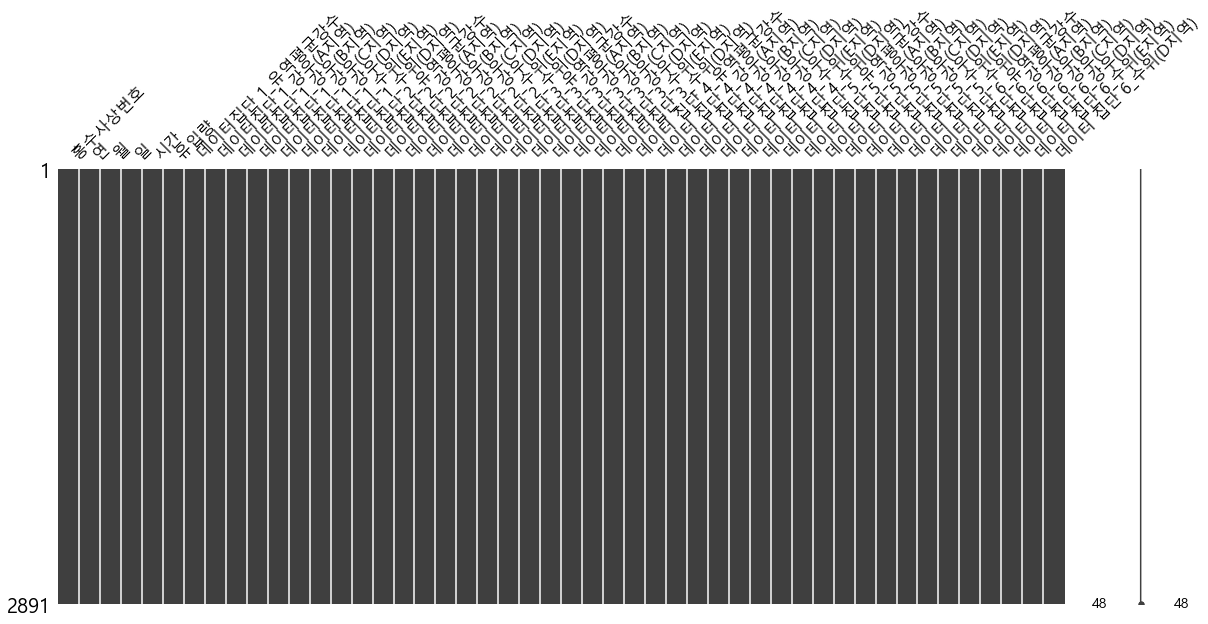

In [9]:
# 결측치 확인 그래프

import missingno as msno
msno.matrix(df, figsize=(20,8))

<br>
<br>

## 3) Data Describe

In [10]:
df['유입량'].describe()

# 평균이 약 1747인데 중앙값은 약 1066 정도
# 상위 75%까지의 강수량이 약 2213인데, max는 약 21504
# 어느 시점에 마구 쏟아지는 것 같은 분포(장마철)

count     2891.000000
mean      1746.902717
std       2181.790290
min          3.541153
25%        384.762514
50%       1065.549253
75%       2213.014288
max      21504.402260
Name: 유입량, dtype: float64

<br>

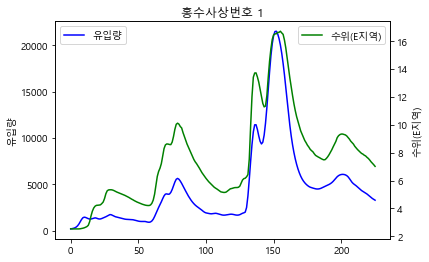

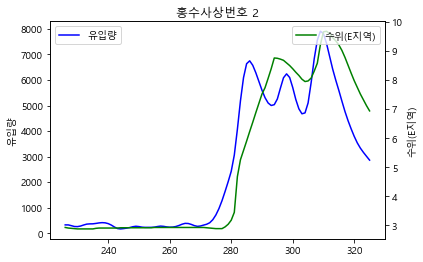

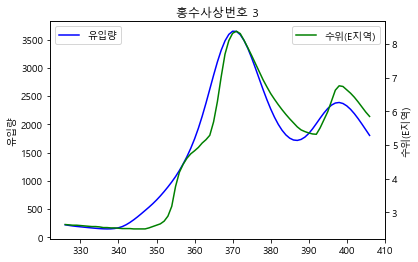

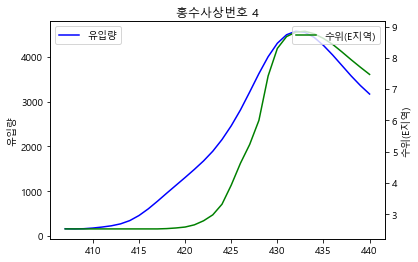

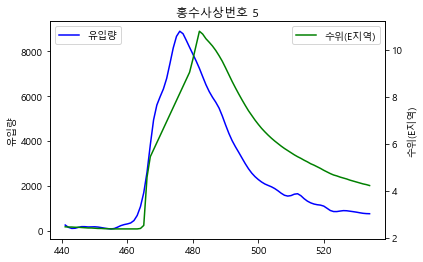

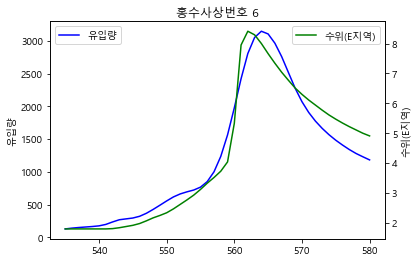

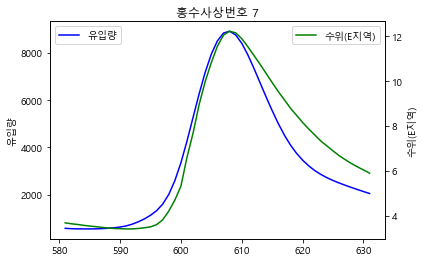

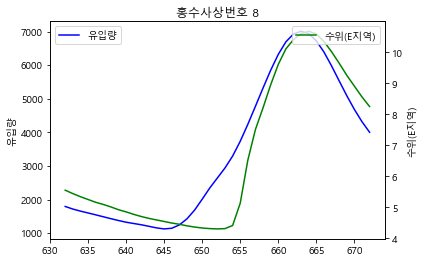

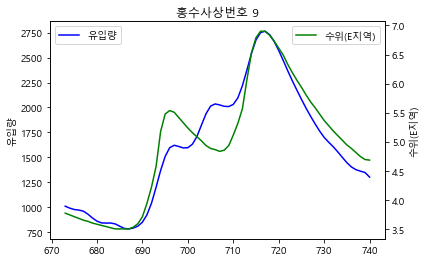

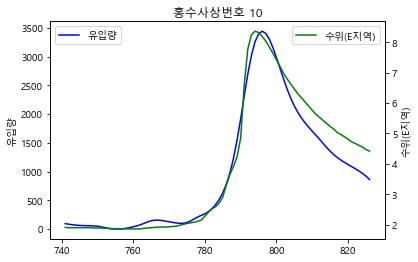

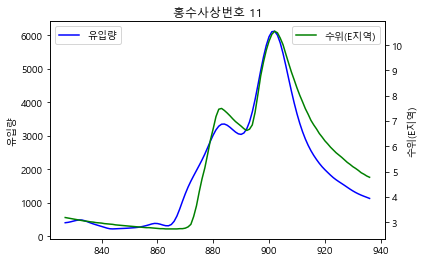

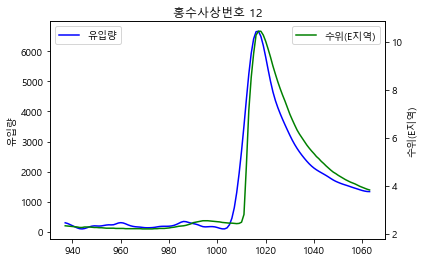

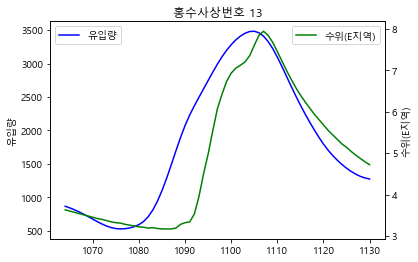

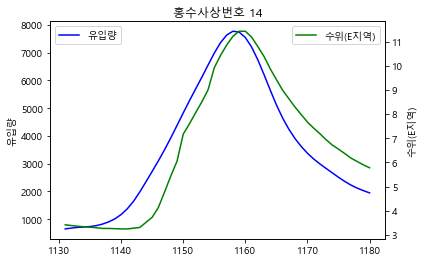

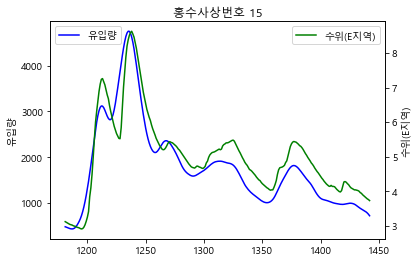

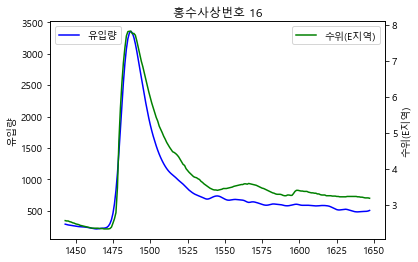

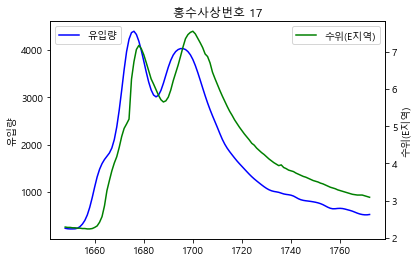

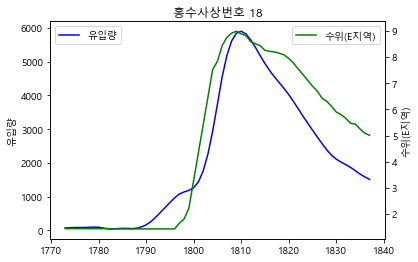

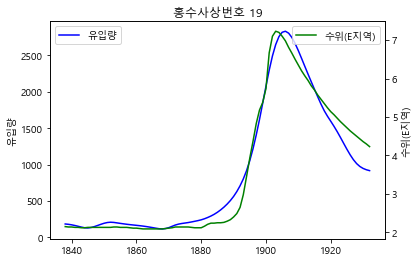

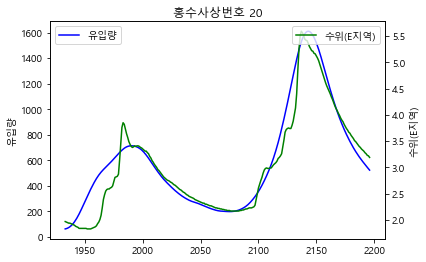

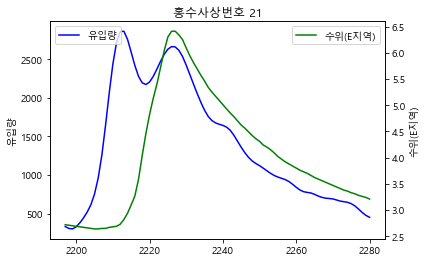

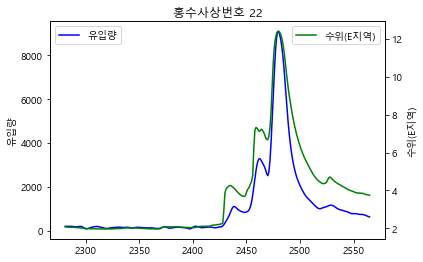

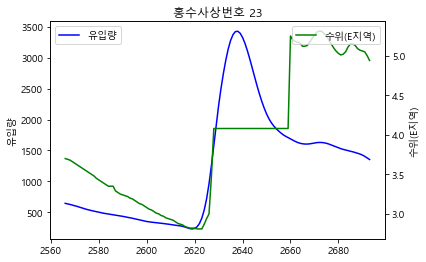

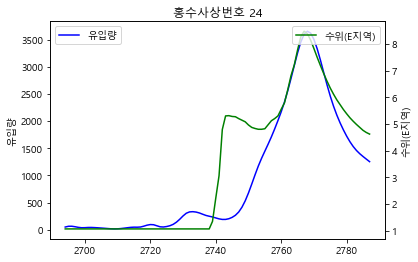

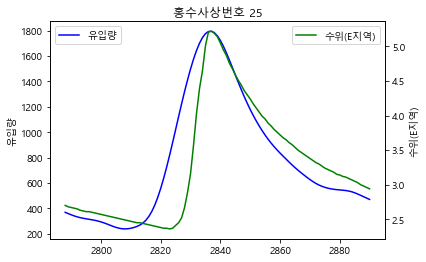

In [11]:
col_list = ['유입량','수위\(E지역\)']

n = len(col_list)
for num in df.홍수사상번호.unique():
    data_num = df[df.홍수사상번호 == num].copy()
    data_num['수위(E지역)_shift'] = data_num['데이터집단 1_수위(E지역)']
    fig, ax1 = plt.subplots(1,1)
    data_num.유입량.plot(ax=ax1, color='blue', label='유입량')
    ax2 = ax1.twinx()
    data_num["데이터집단 1_수위(E지역)"].plot(ax=ax2, color='green', label='수위(E지역)')
    ax1.set_ylabel('유입량')
    ax2.set_ylabel('수위(E지역)')
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    plt.title(f"홍수사상번호 {num}")
    plt.show()

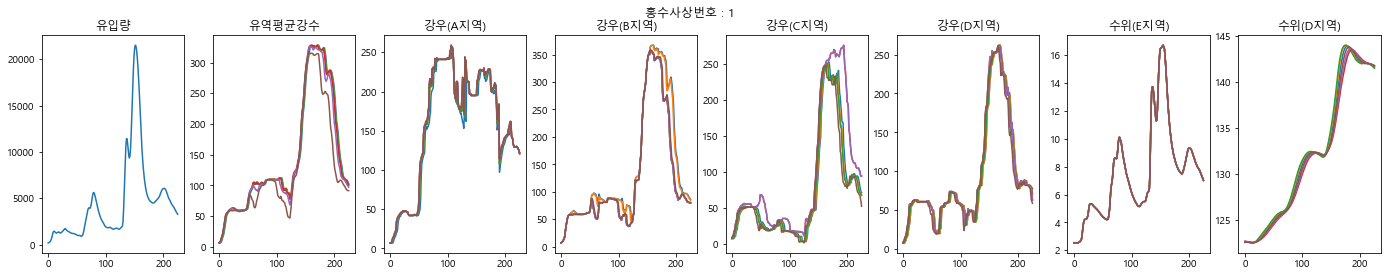

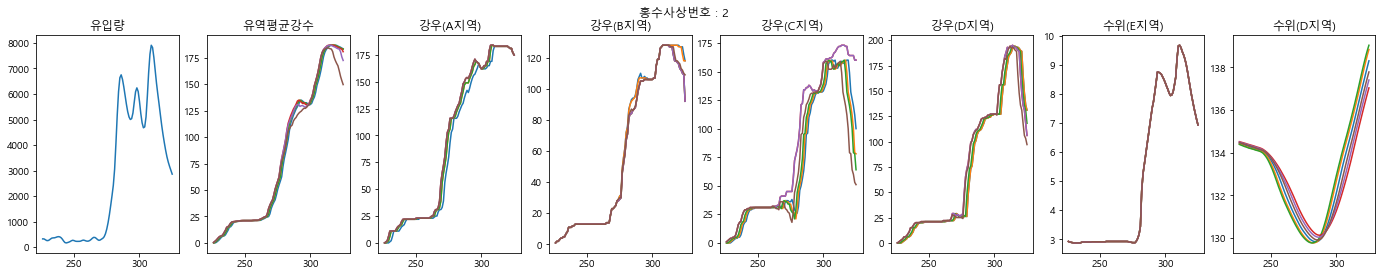

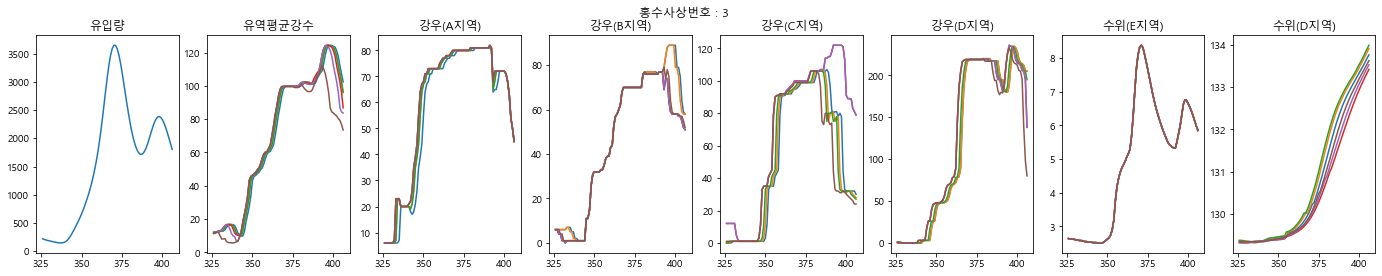

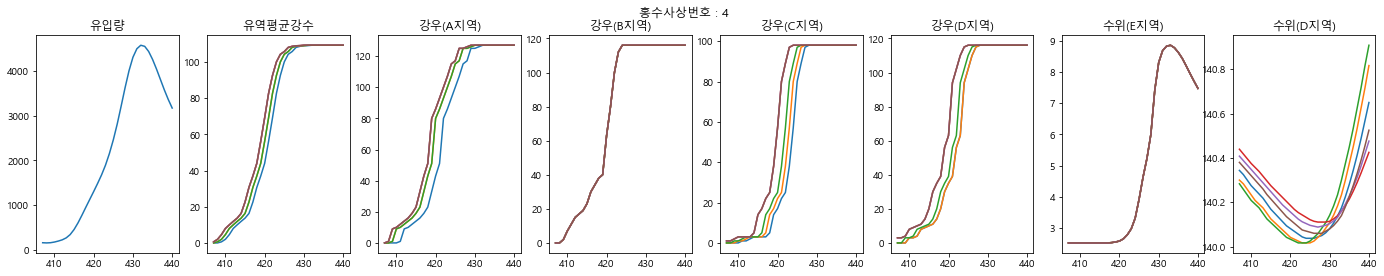

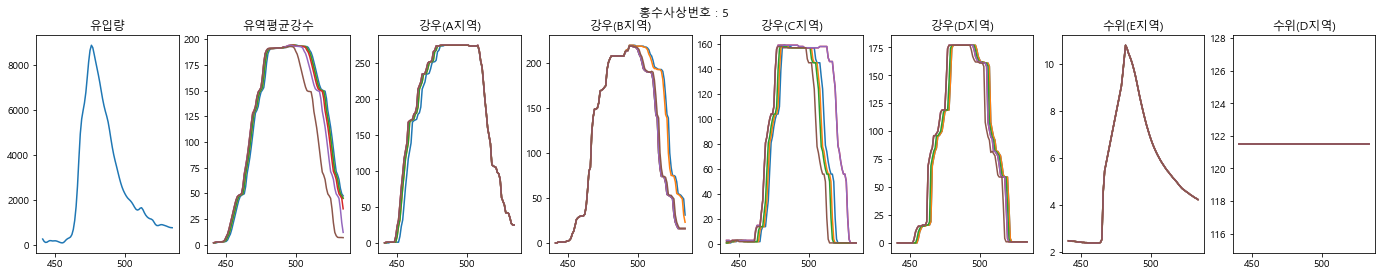

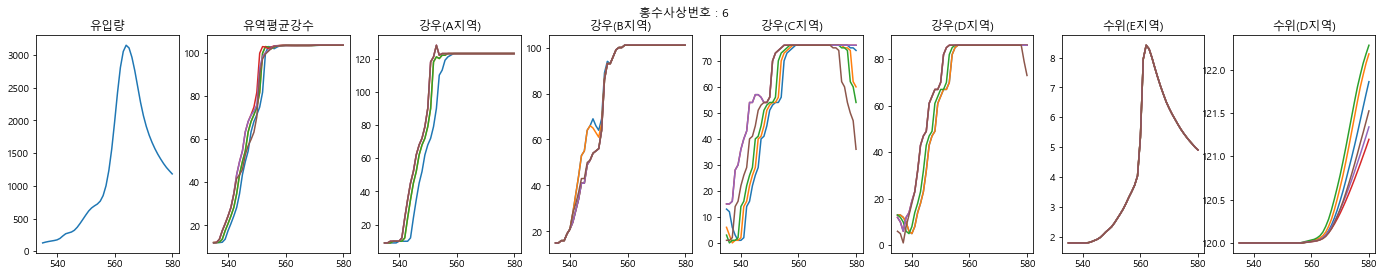

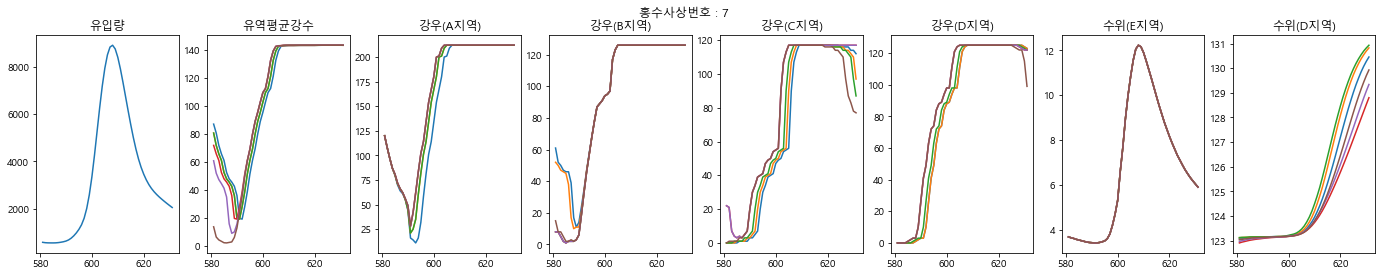

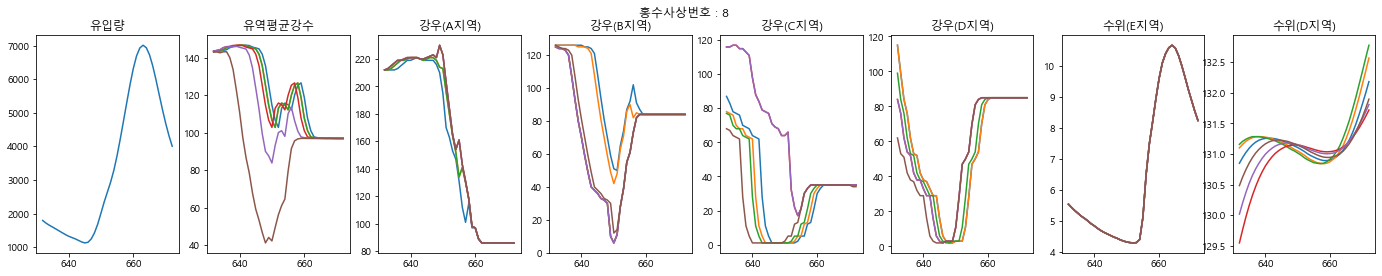

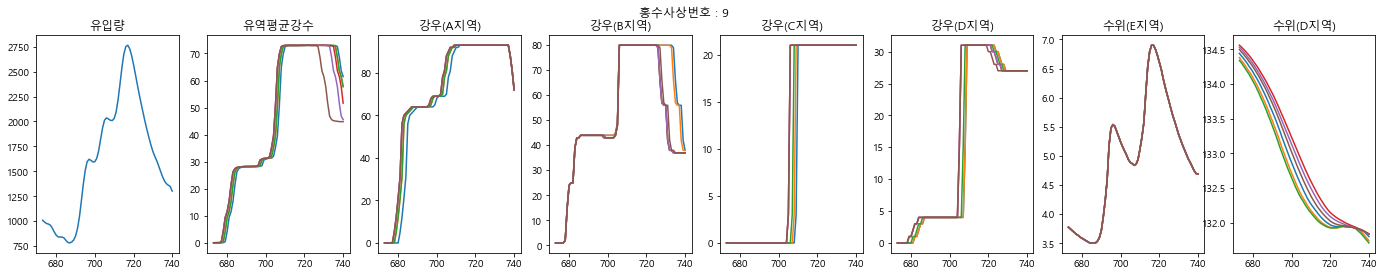

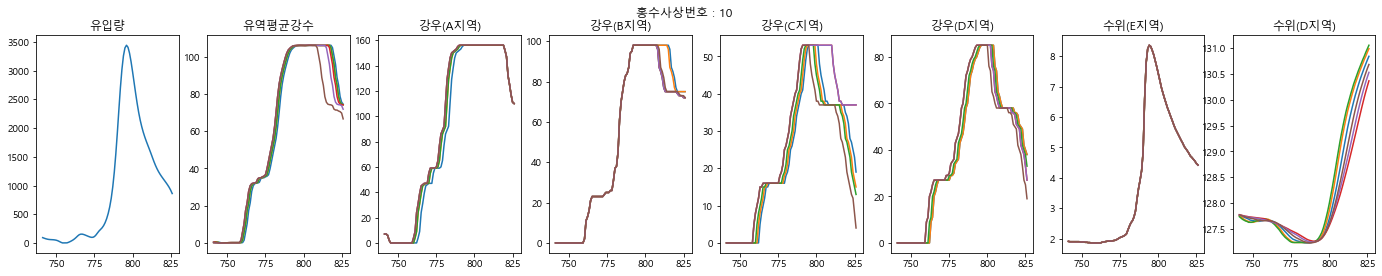

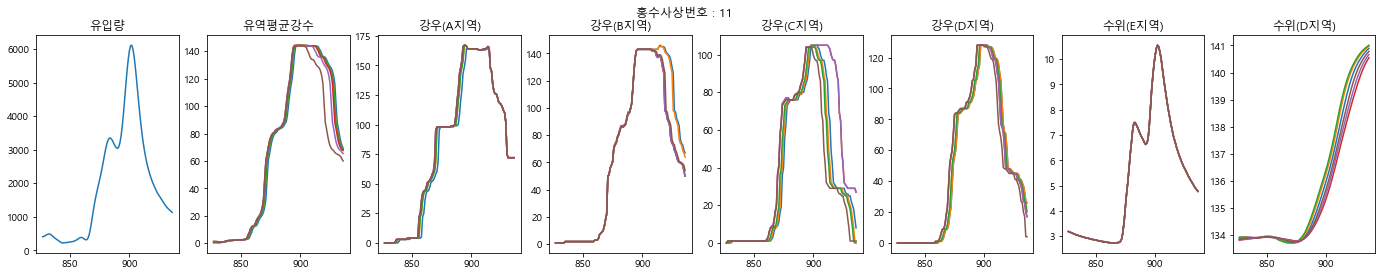

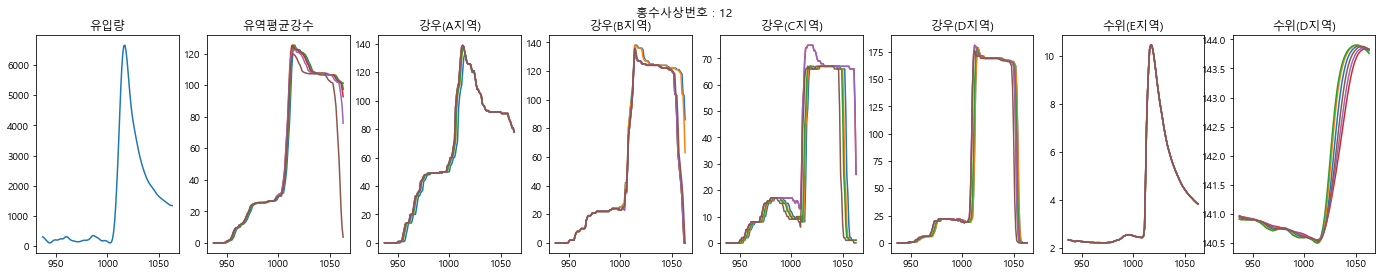

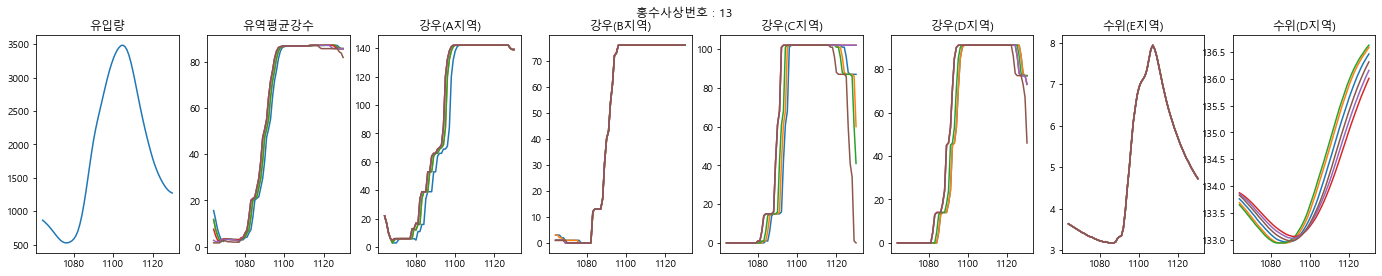

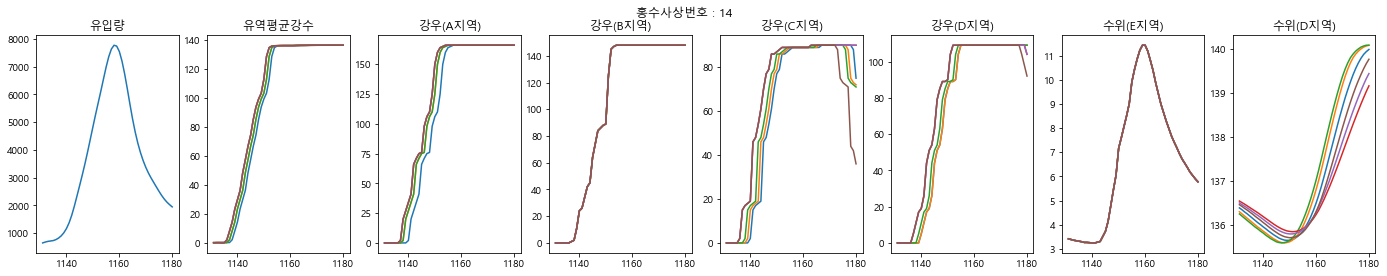

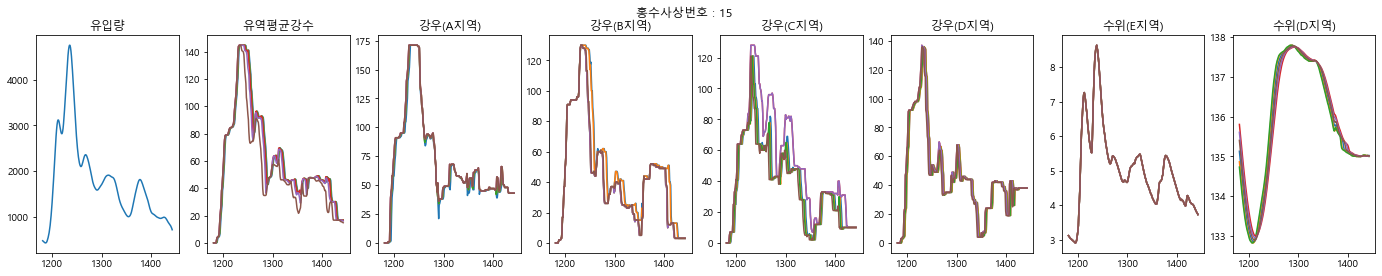

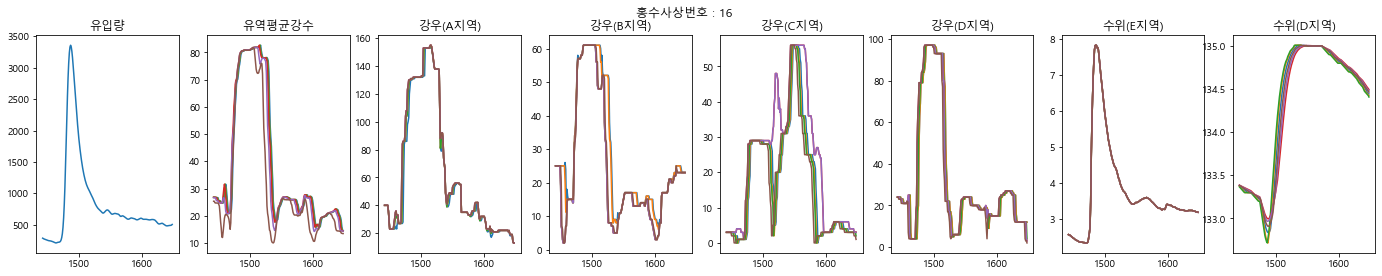

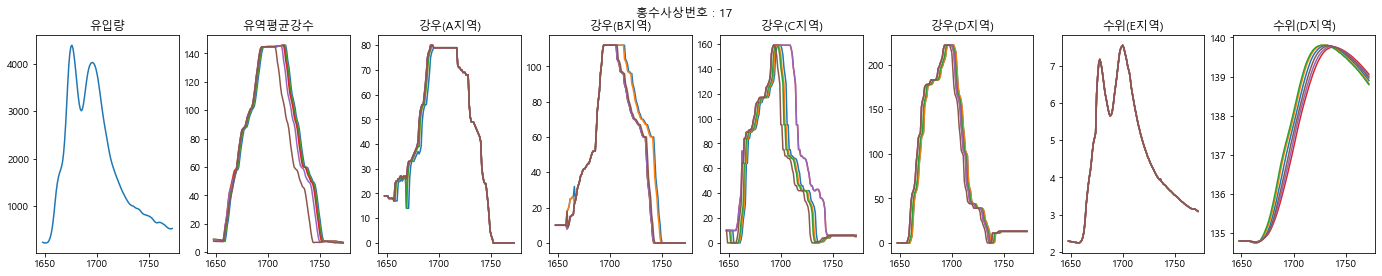

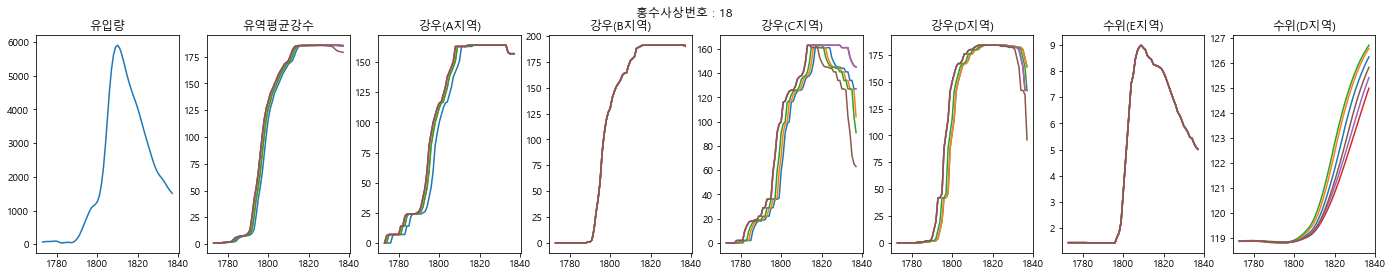

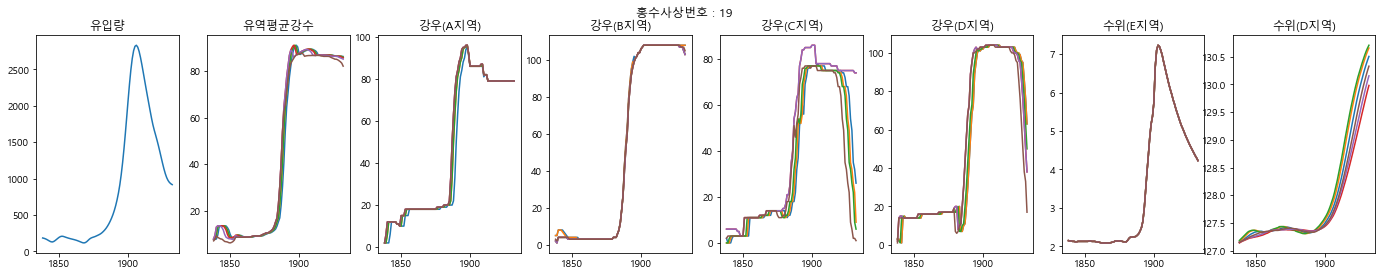

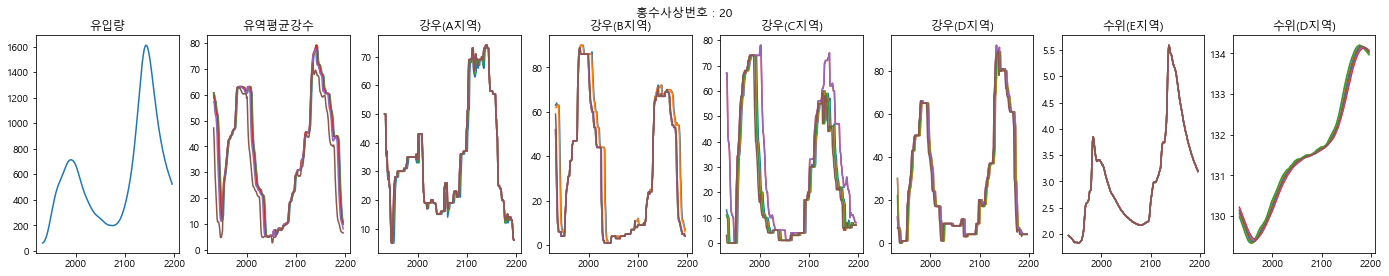

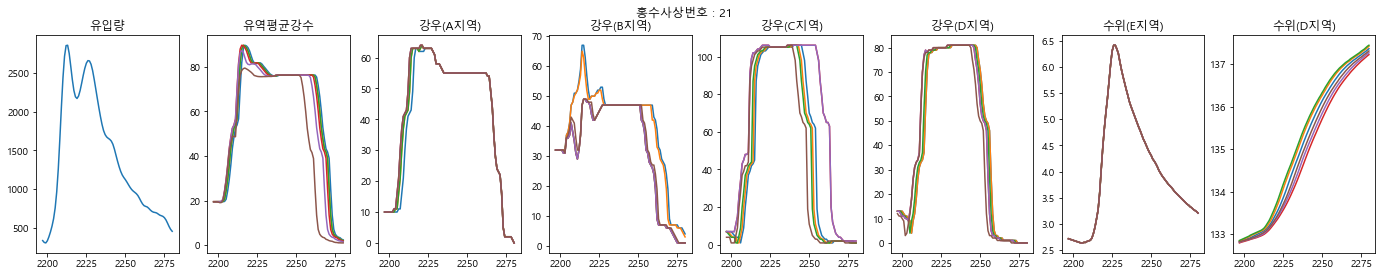

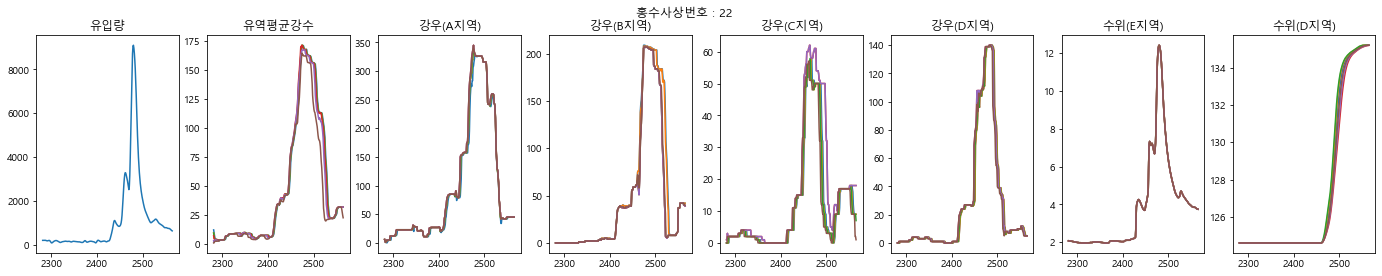

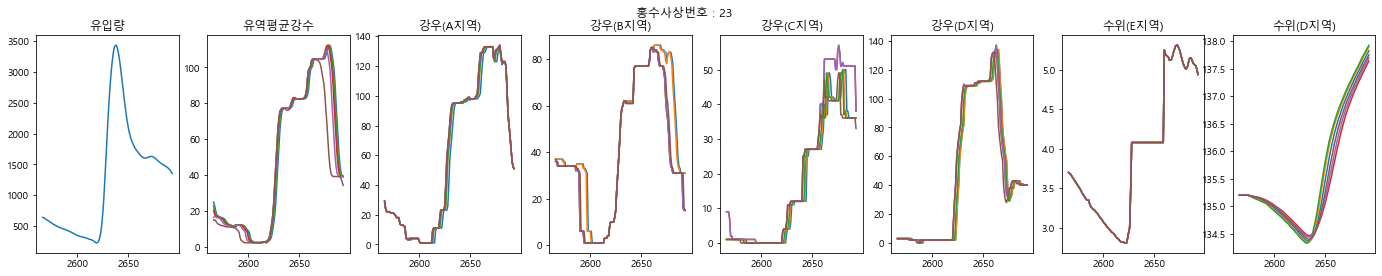

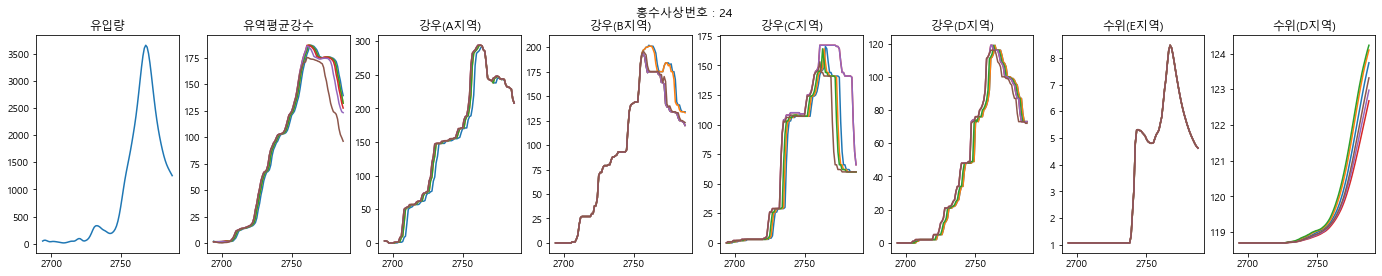

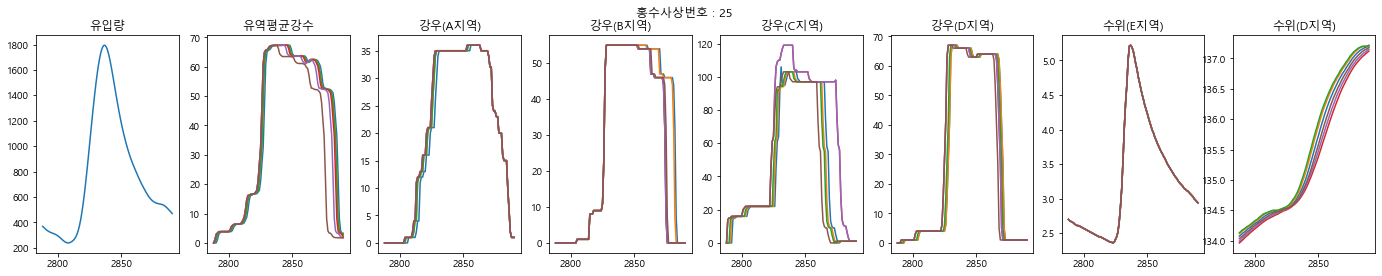

In [12]:
col_list = ['유입량','유역평균강수', '강우\(A지역\)', '강우\(B지역\)', 
            '강우\(C지역\)', '강우\(D지역\)', '수위\(E지역\)', '수위\(D지역\)']

n = 8
for num in df.홍수사상번호.unique():
    axe_list = []
    data_num = df[df.홍수사상번호 == num].copy()
    fig = plt.figure(figsize=(24,4))
    for i in range(n):
        axe_list.append(fig.add_subplot(1, n, i+1))
        data_num.filter(regex=col_list[i]).plot(ax=axe_list[i])
        axe_list[i].legend().set_visible(False)
        axe_list[i].set_title(col_list[i].replace("\\", ''))
    plt.suptitle(f'홍수사상번호 : {num}')
    plt.show()

<br>
<hr>
<br>

# 2.이상치 탐색

## 1) Tukey Fences 방법을 사용한 이상치 탐색

In [13]:
# 홍수사상번호 별로 구간을 나누어 이상치 구하기

s = 0  # 이상치 총 개수

for i in range(1,26):
    IQR = df['유입량'][cnts[i-1]:cnts[i]].quantile(0.75) - df['유입량'][cnts[i-1]:cnts[i]].quantile(0.25)
    max_value = df['유입량'][cnts[i-1]:cnts[i]].quantile(0.75) + 1.5*IQR
    min_value = df['유입량'][cnts[i-1]:cnts[i]].quantile(0.25) - 1.5*IQR
    if min_value <= 0: min_value = 0
    
    isOutlier = df['유입량'][cnts[i-1]:cnts[i]] > max_value
    outliers = isOutlier.sum(axis=0)
    s += outliers
    
    # 이상치가 존재하면 출력
    if(outliers > 0):
        print("홍수사상번호 "+str(i)+"번의 이상치 개수:", outliers)

print("\n총 개수:",s)

홍수사상번호 1번의 이상치 개수: 21
홍수사상번호 12번의 이상치 개수: 10
홍수사상번호 15번의 이상치 개수: 16
홍수사상번호 16번의 이상치 개수: 32
홍수사상번호 20번의 이상치 개수: 23
홍수사상번호 22번의 이상치 개수: 37

총 개수: 139


## 2) 지수가중이동평균 이용하여 이상치 탐색

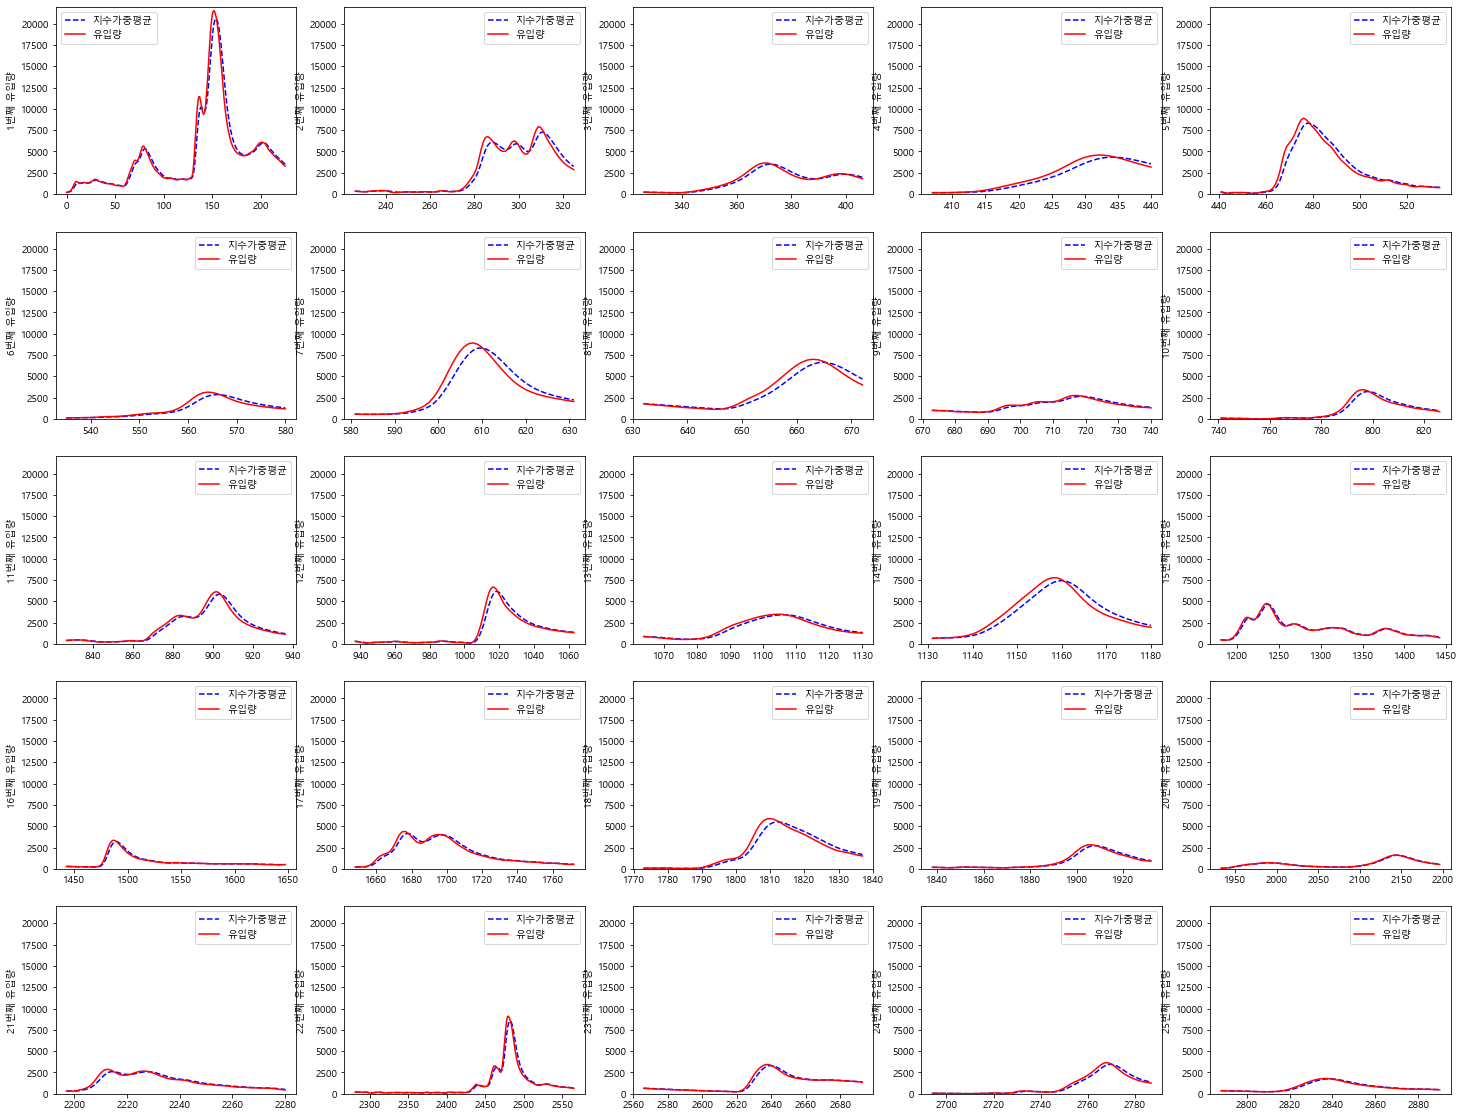

In [14]:
# 홍수사상번호마다 유입량 분포 및 지수가중이동평균을 이용항 가중치 탐색
fig, ax = plt.subplots(5,5,figsize=(25,20))

for i in range(1,26):
    plt.subplot(5,5,i)

    flood = df['유입량'][cnts[i-1]:cnts[i]]
    eMov = flood.ewm(span=5).mean()
    plt.plot(eMov, linestyle='--', color='b', label = "지수가중평균")
    plt.plot(df['유입량'][cnts[i-1]:cnts[i]], color='r', label = "유입량")
    
    plt.ylabel(str(i)+"번째 유입량")
    plt.ylim(0,22000)
    plt.legend()
plt.show()

<br>
<br>

## 3) 데이터 집단 별 이상치 탐색

<Figure size 1800x1440 with 0 Axes>

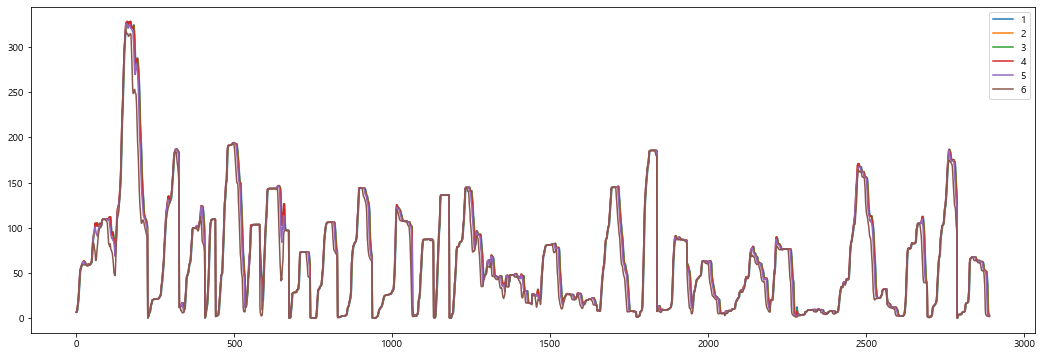

<Figure size 1800x1440 with 0 Axes>

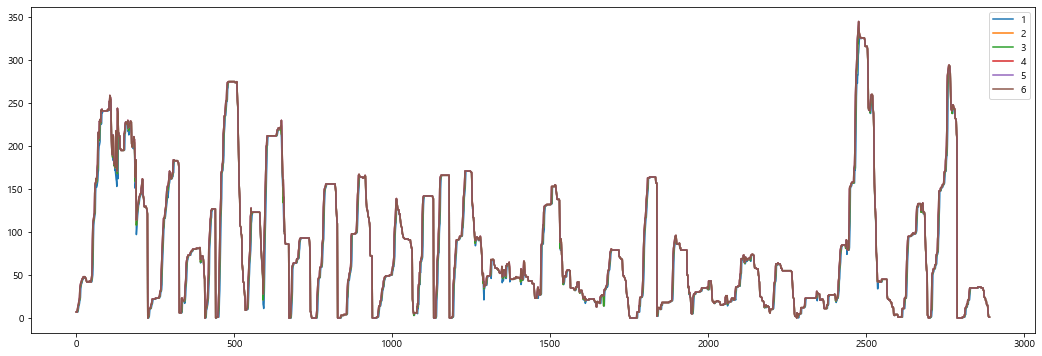

<Figure size 1800x1440 with 0 Axes>

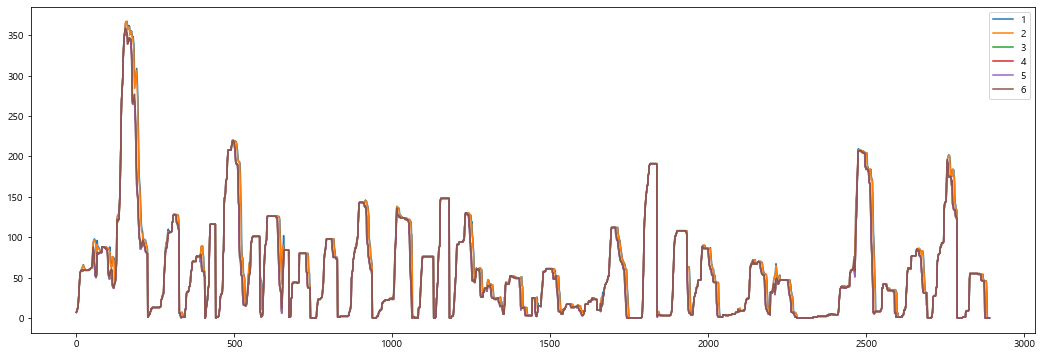

<Figure size 1800x1440 with 0 Axes>

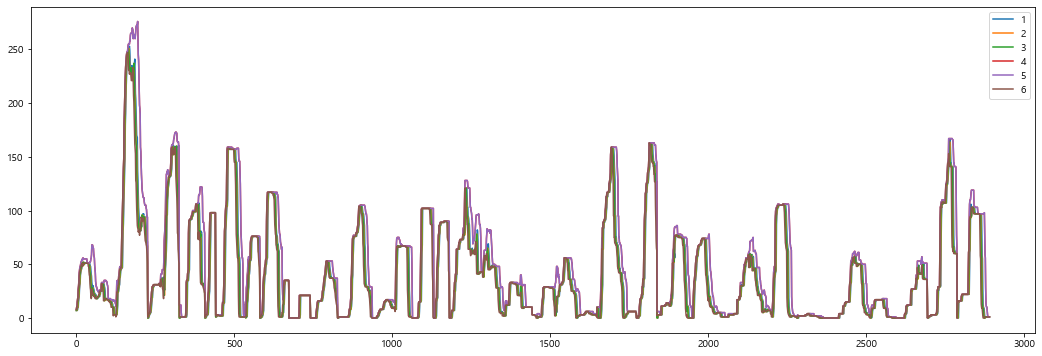

<Figure size 1800x1440 with 0 Axes>

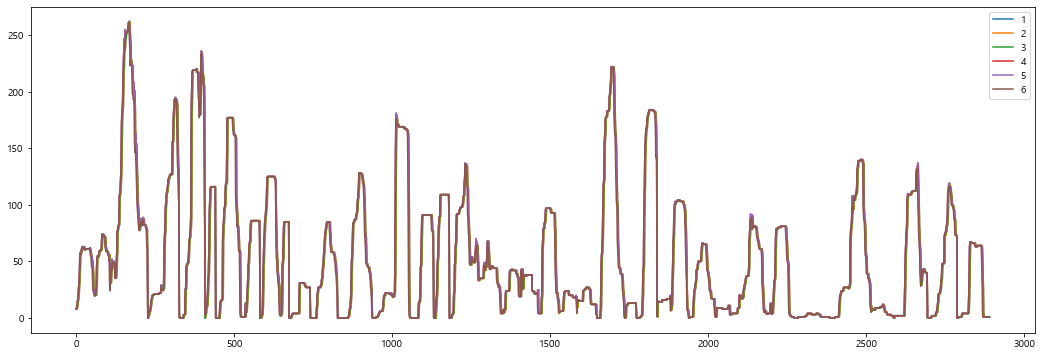

<Figure size 1800x1440 with 0 Axes>

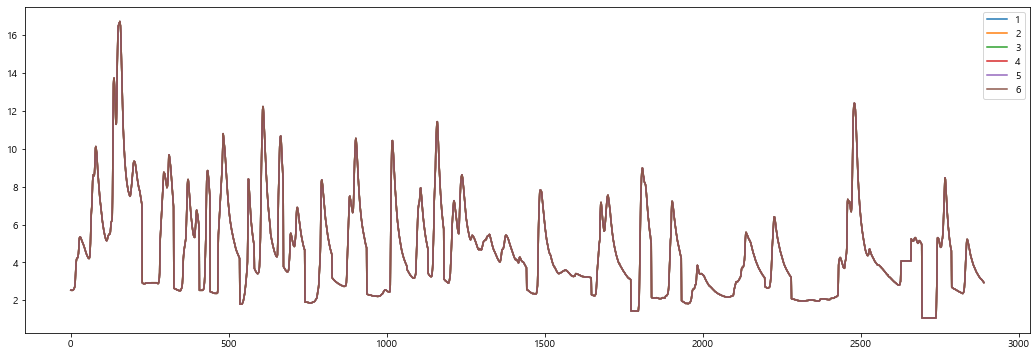

<Figure size 1800x1440 with 0 Axes>

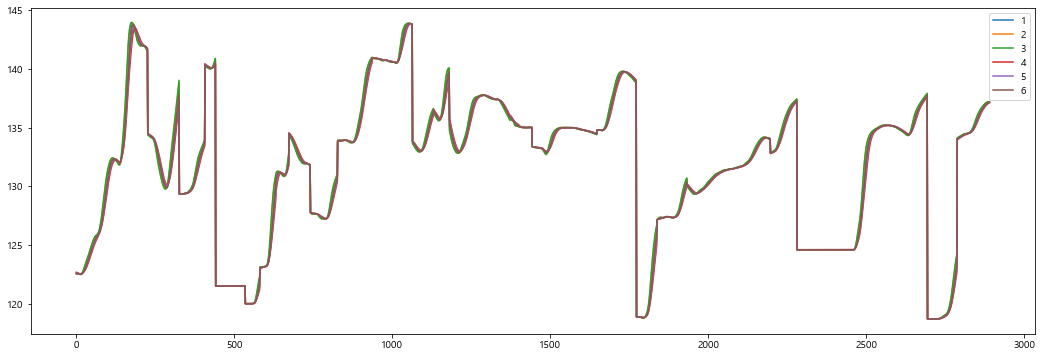

In [15]:
## 각 시간대마다 데이터 집단 간의 변수들의 값 중에 이상치를 가지는지 확인(x축은 시간 순으로 정렬된 인덱스)
variables = ['유역평균강수','강우\(A지역\)','강우\(B지역\)','강우\(C지역\)','강우\(D지역\)','수위\(E지역\)','수위\(D지역\)']

for variable in variables:
    plt.figure(figsize=(25, 20))
    data = df.filter(regex=variable)
    data.columns = list(range(1,7))
    data.plot(figsize=(18,6))
    plt.legend()
    plt.show()

**7개의 변수 모두 6개의 데이터 집단 내에서 비슷한 값을 가짐.**

<br>
<hr>
<br>

# 3.Correlation 탐색

## 1) scatterplot

In [16]:
dataGroup = [df.iloc[:,i:i+7] for i in range(6,48,7)]

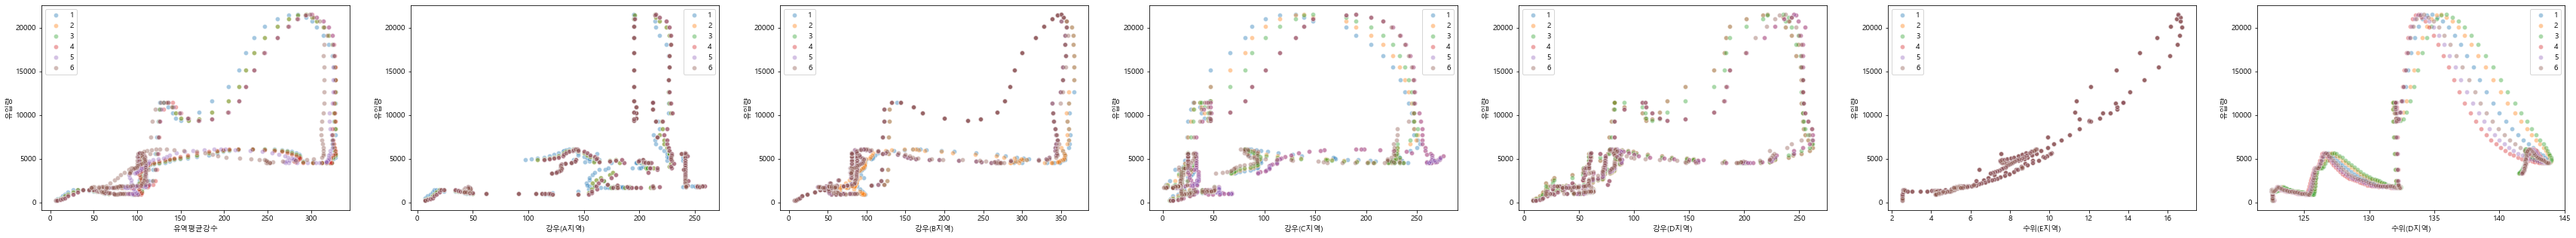

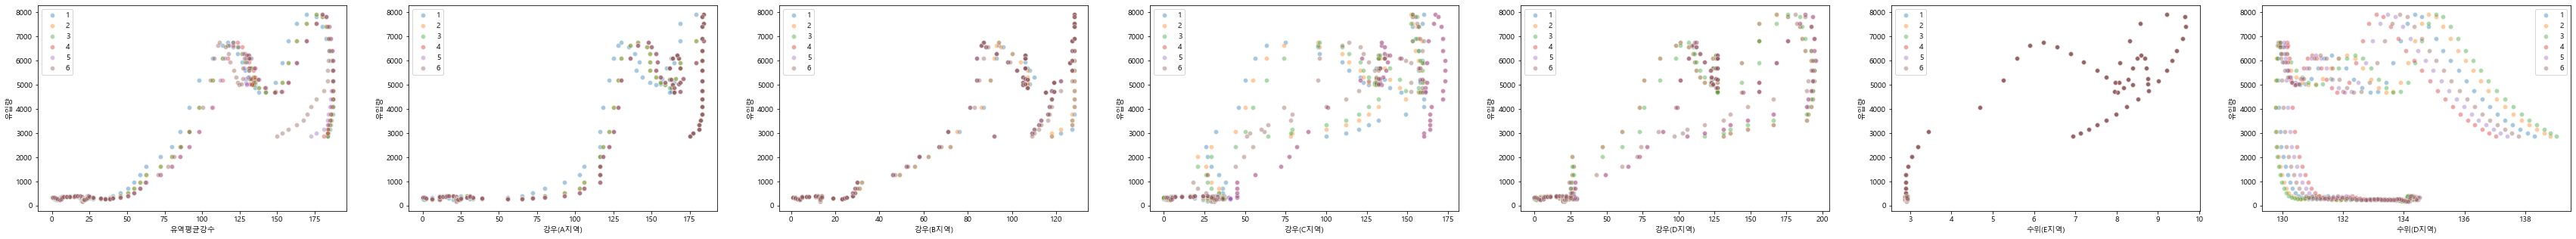

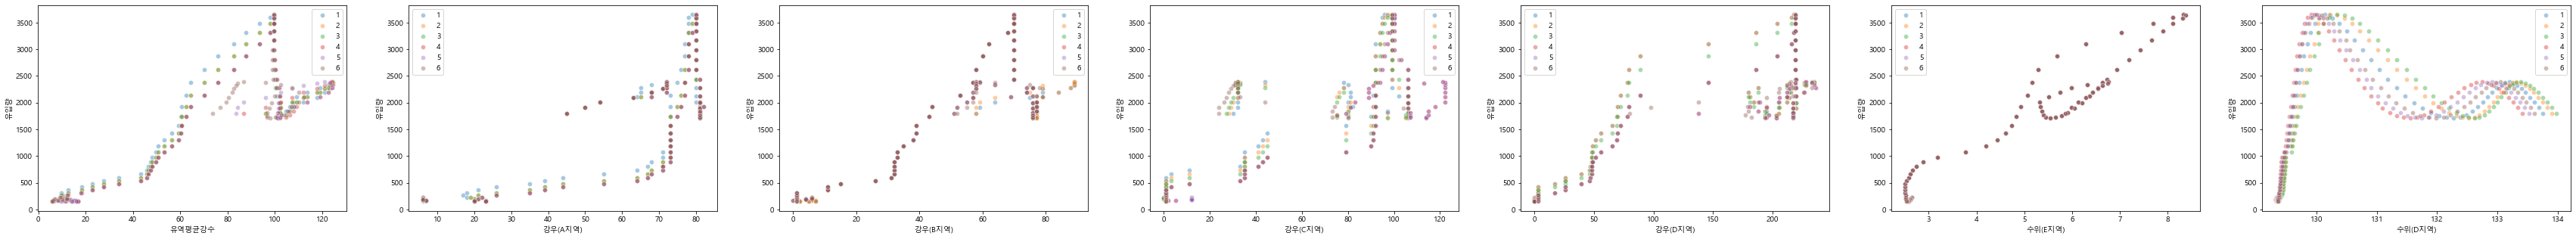

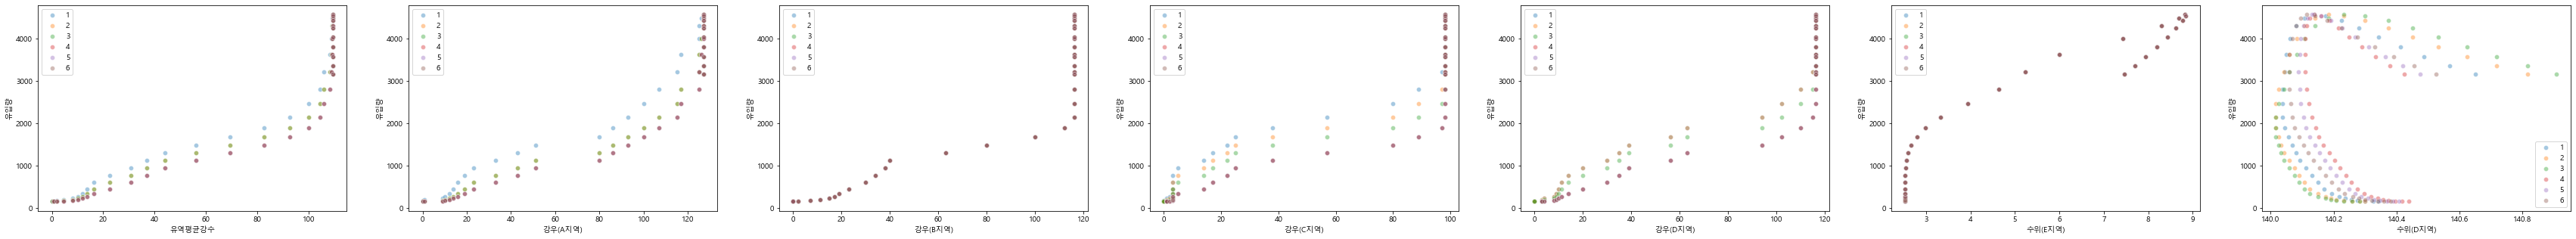

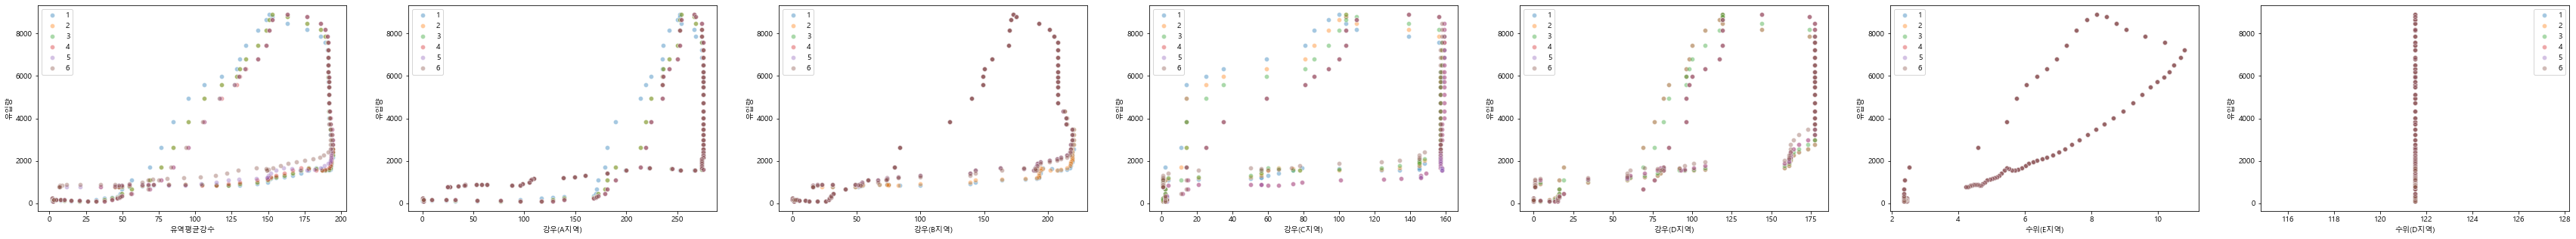

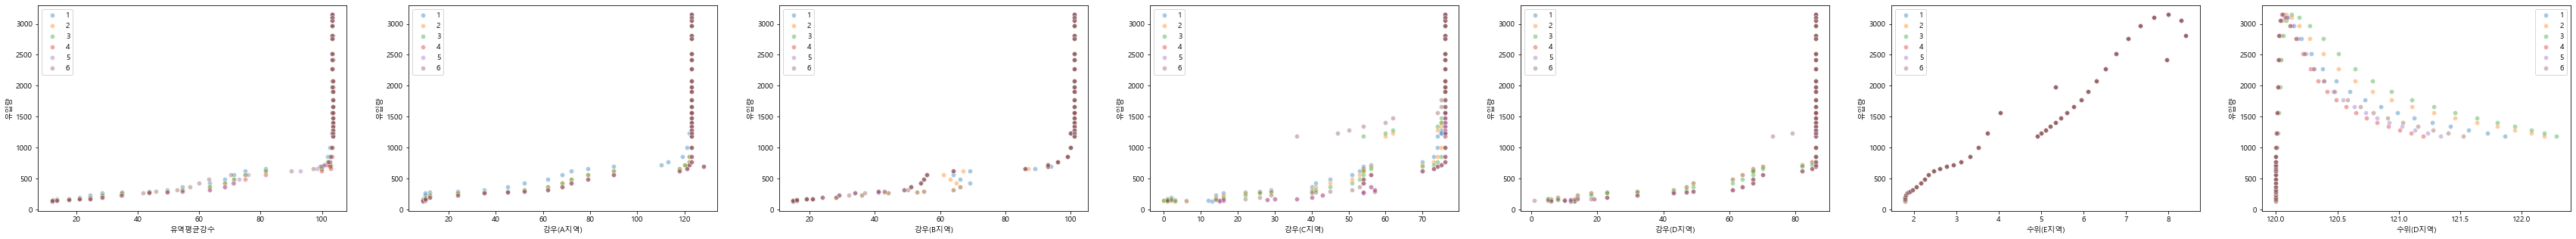

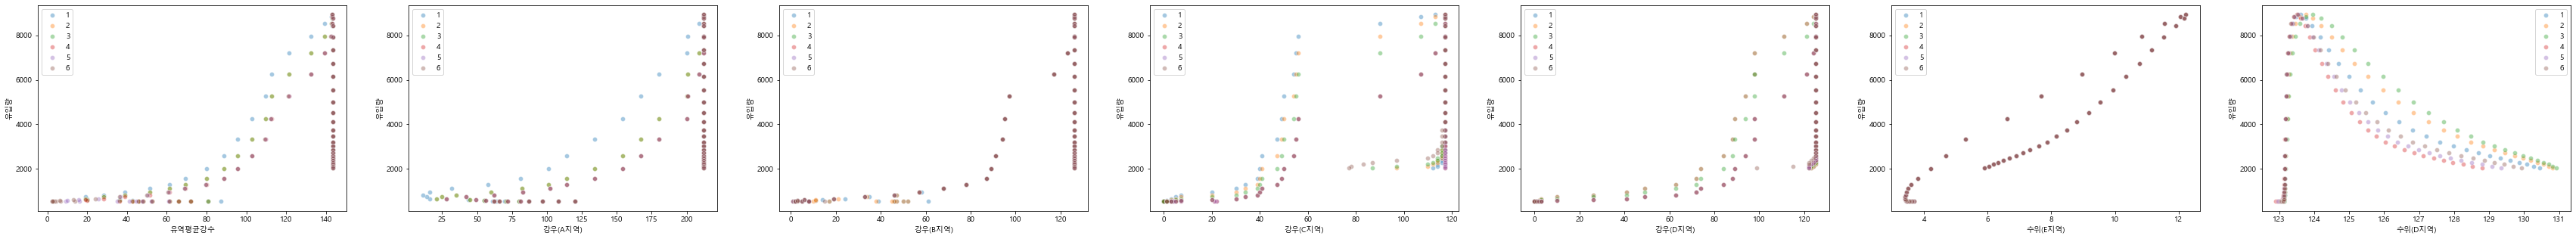

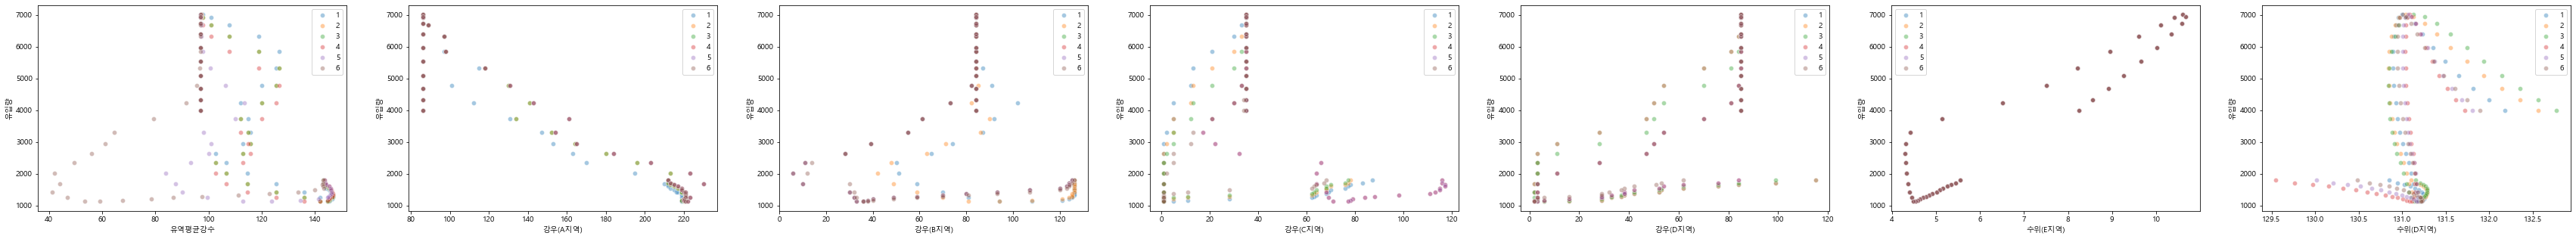

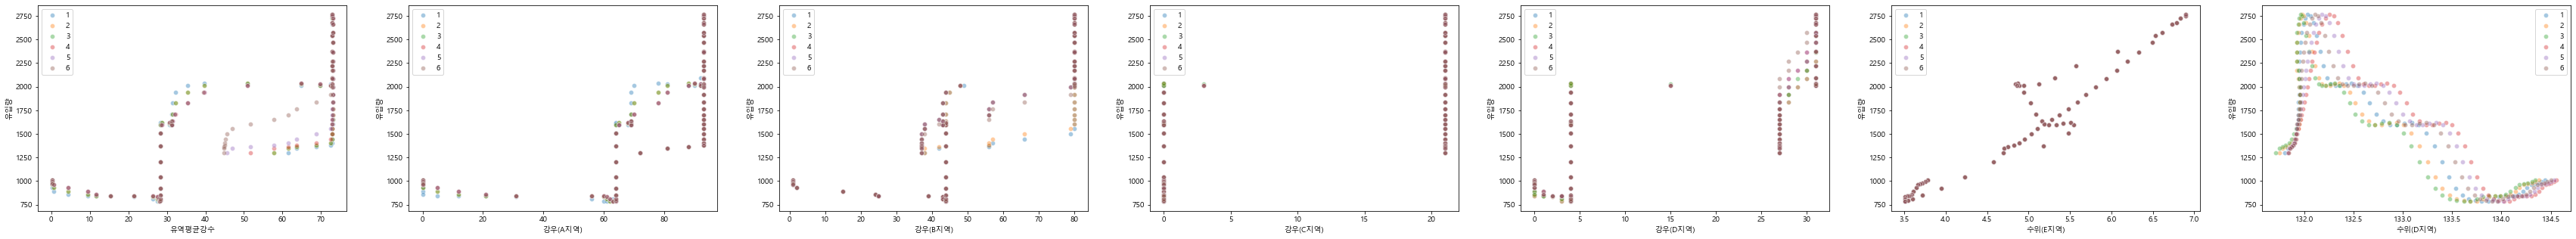

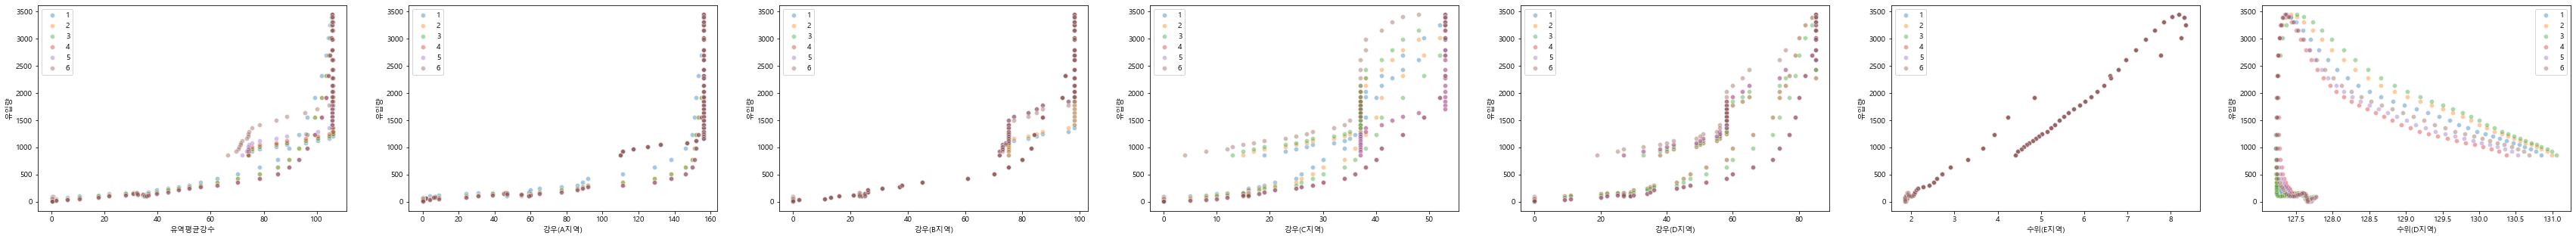

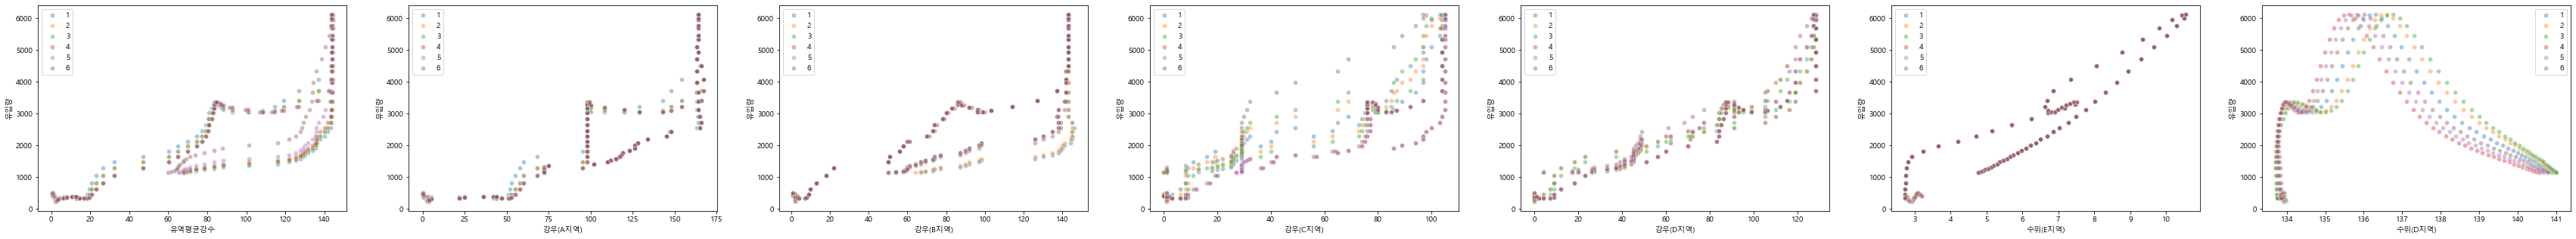

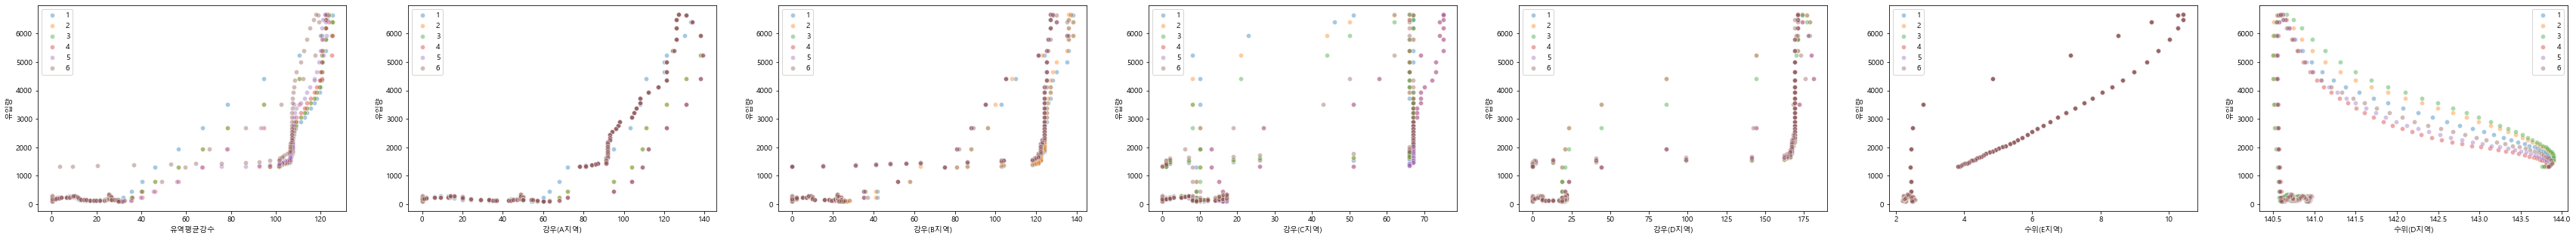

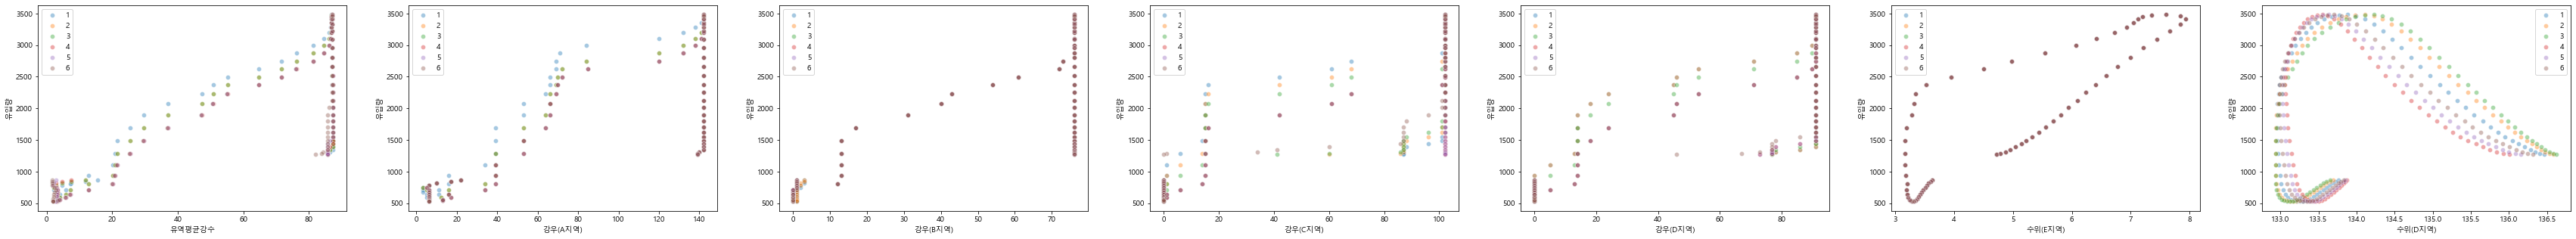

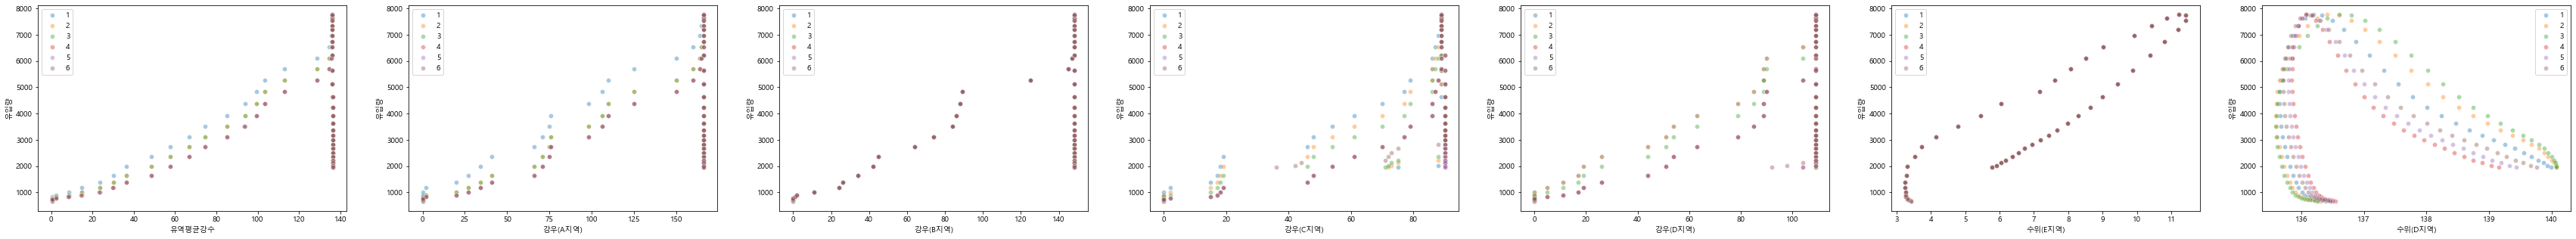

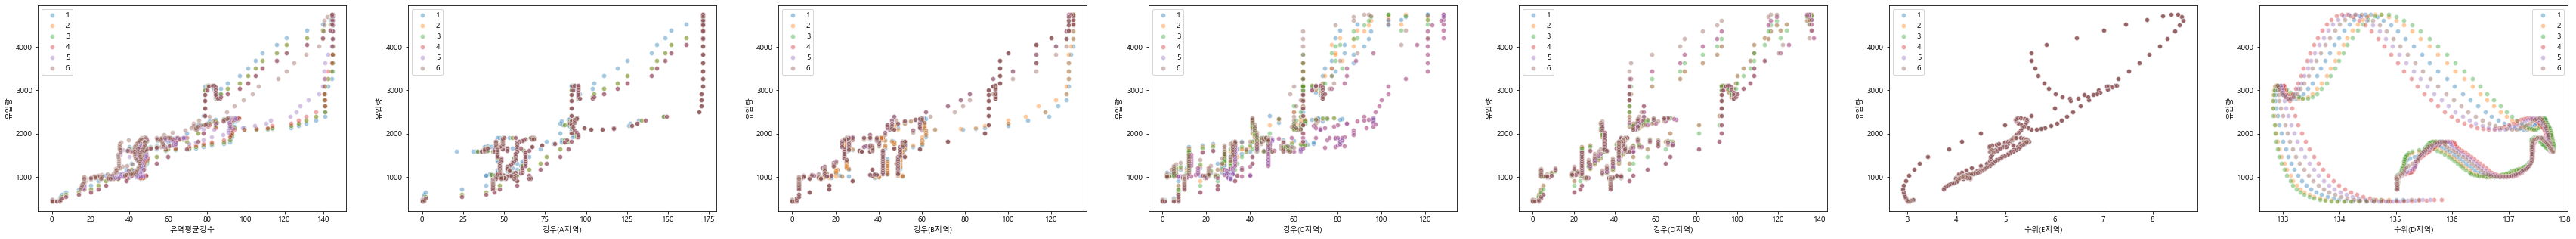

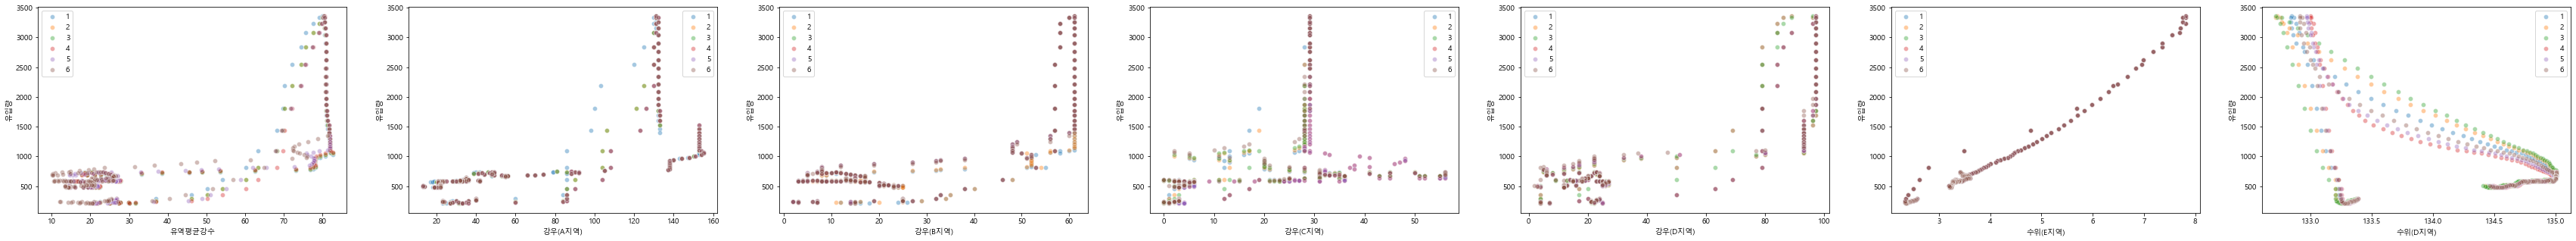

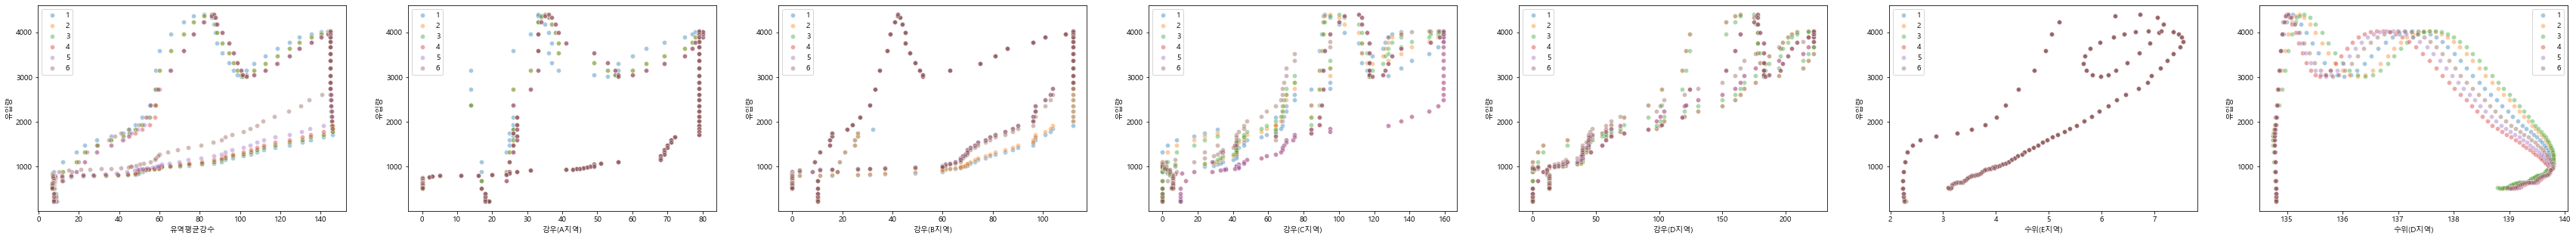

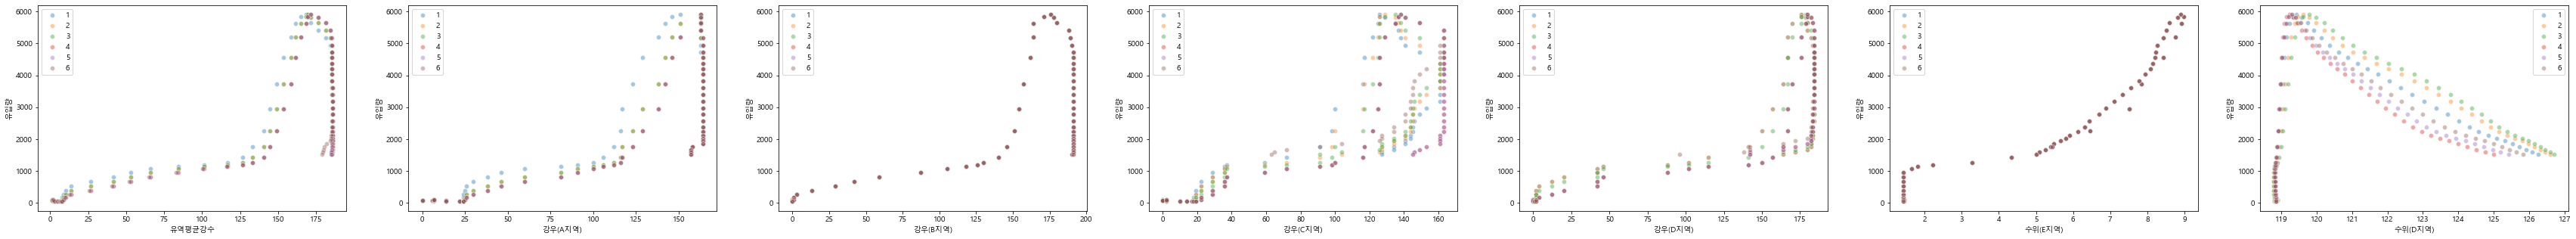

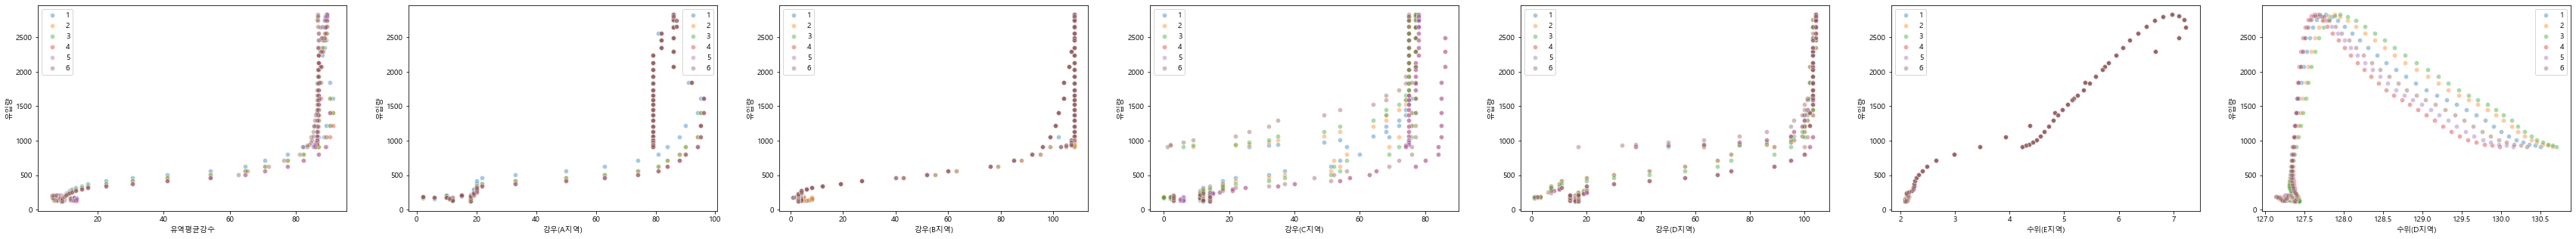

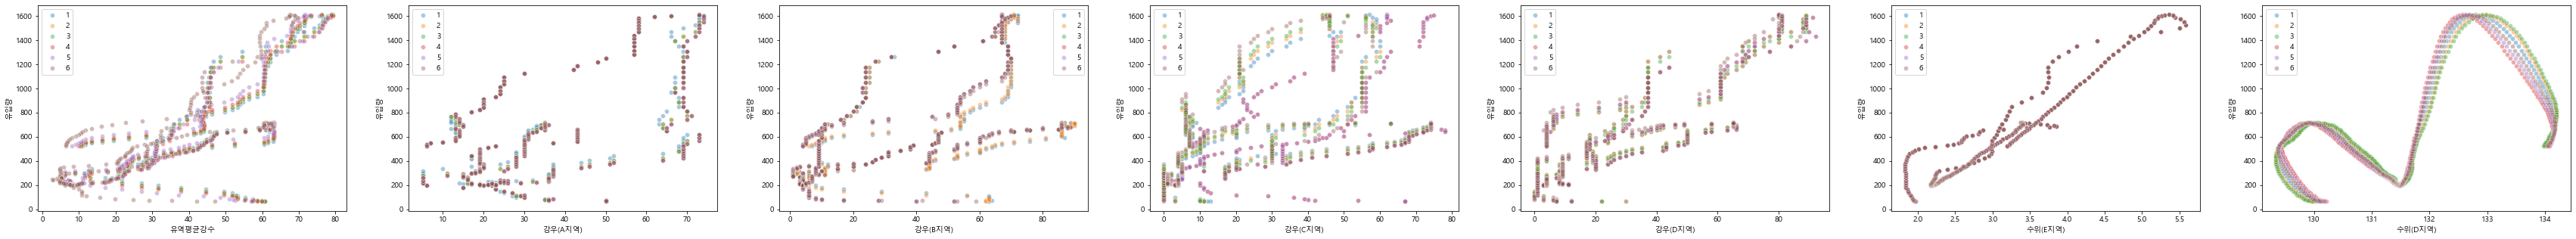

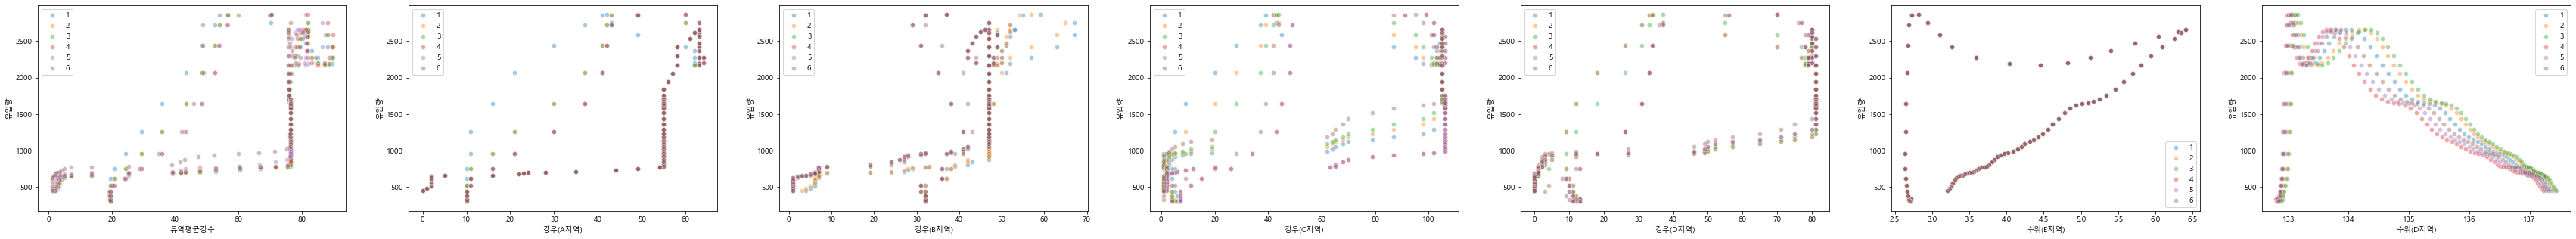

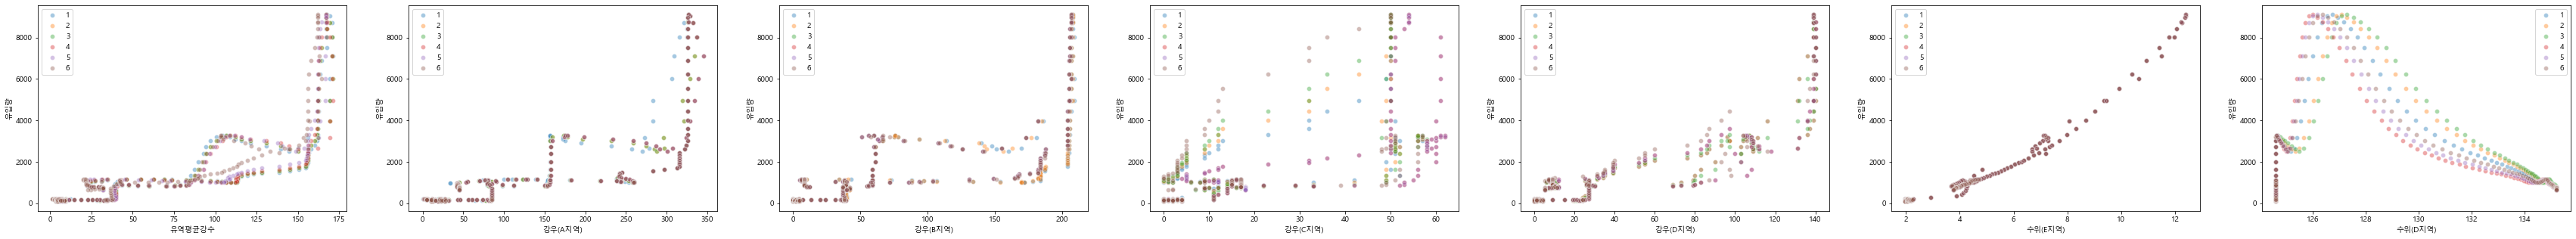

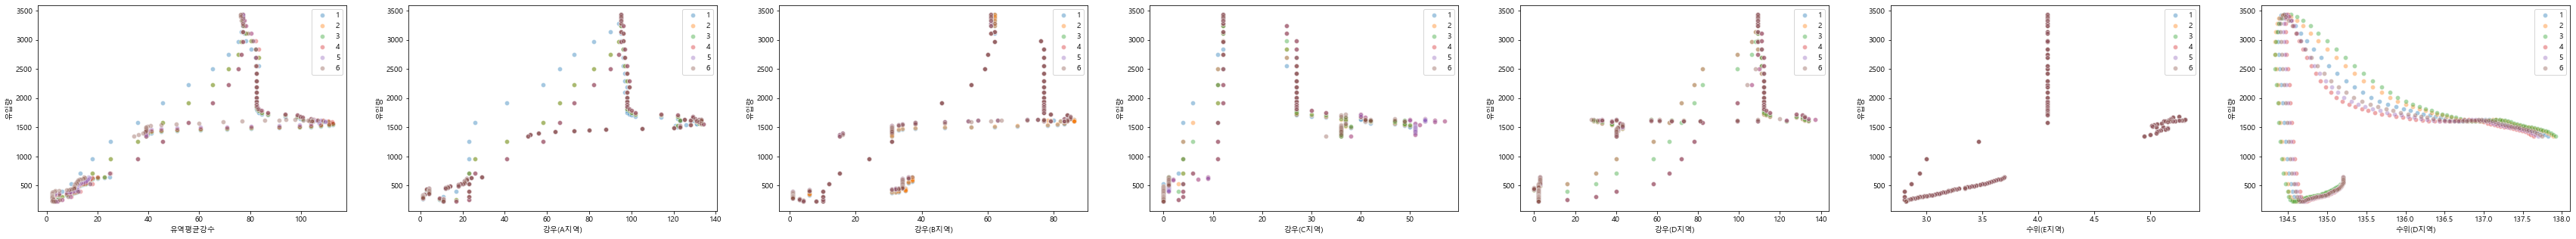

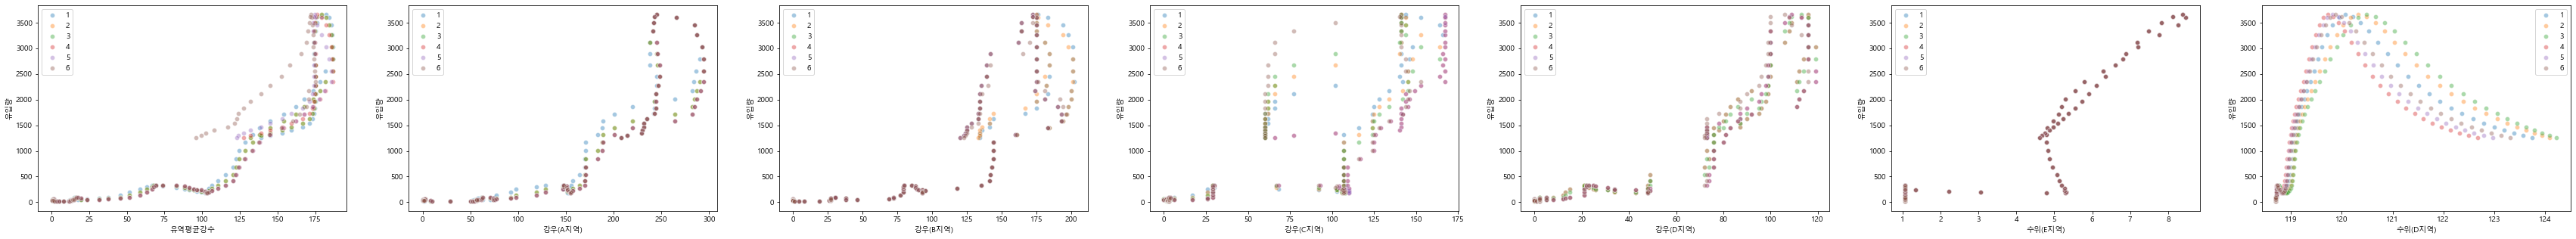

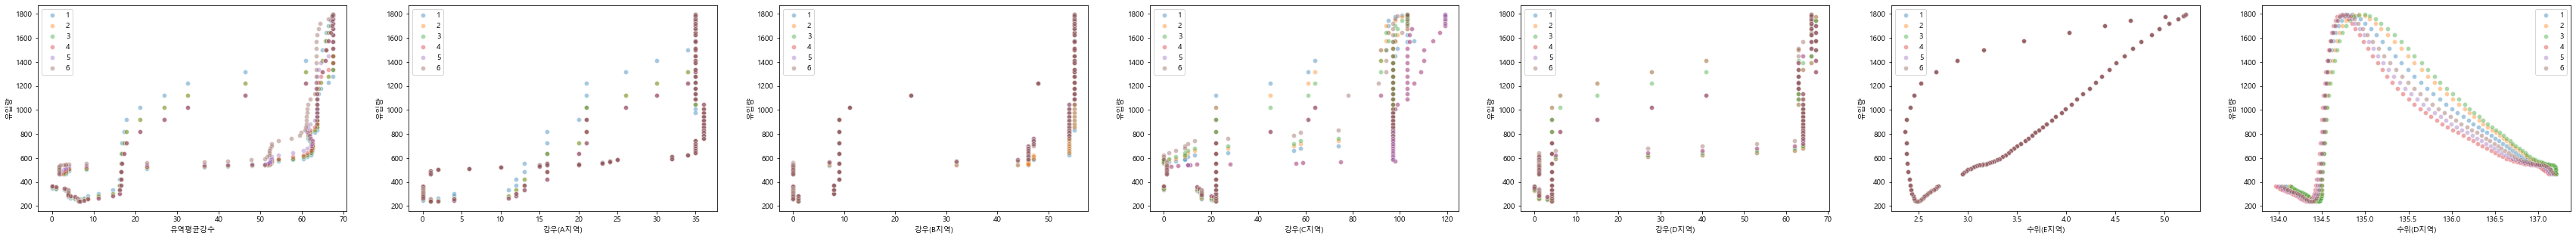

In [17]:
# 25 * 7
# 각 행이 홍수사상번호, 각 열이 데이터 집단의 7가지 변수

for k in range(1,26):
    figure, axes = plt.subplots(1,7,figsize=(60,5))
    for i in range(7):
        for j in range(6):
            temp = dataGroup[j][cnts[k-1]:cnts[k]]
            sns.scatterplot(x=temp.iloc[:,i], y=df['유입량'][cnts[k-1]:cnts[k]], alpha=0.4,
                            label=j+1, ax=axes[i])
        axes[i].set_xlabel(dataGroup[0].columns[i].split('_')[1])
        axes[i].legend()
        axes[i].set_ylabel("유입량")
plt.show()

## 2) Heatmap

In [18]:
res = []
for i in range(1,26):
    row = np.zeros(7)
    for k in range(6,13):
        tmp = np.zeros(6)
        for j in range(6):
            corrDf = pd.concat([df.iloc[cnts[i-1]:cnts[i],5],df.iloc[cnts[i-1]:cnts[i],k+7*j]], axis=1)
            tmp[j] = corrDf.corr().iloc[1,0]
        avg_corr = tmp.sum()/6
        row[k-6] = avg_corr
    res.append(row)

res = np.array(res)
corr_df = pd.DataFrame(res, index=list(range(1,26)), 
                       columns = ['유역평균강수', '강우(A지역)', '강우(B지역)', 
                                  '강우(C지역)', '강우(D지역)', '수위(E지역)', '수위(D지역)'])

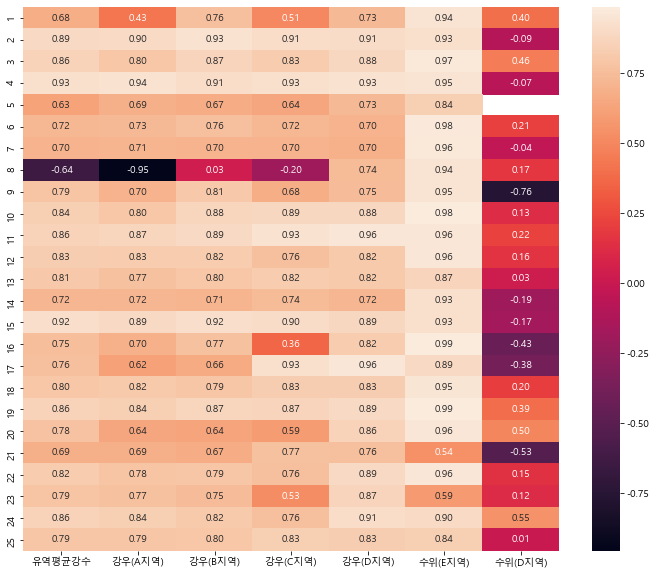

In [19]:
# (홍수사상번호별 유입량) * (변수) heatmap

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_df,annot=True, fmt='0.2f')
plt.show()

**수위(D지역)을 제외하고는 대부분 유입량과 양의 관계를 가진다.**

<br>
<hr>
<br>